In [2]:
from class_lorenz96_mdl import LORENZ96
from class_state_vec import state_vector
import matplotlib.pyplot as plt
import numpy as np
import math
import random

name = 'lorenz96_run'

t0=0
t1 = 8030   #ending time point, 1 is 5 days, 8030*5 = 110 years   73730*5 = 1010 years
dt=0.005
dt_output = 0.05 # print the value for each 6-hour

F = 8
N = 40
np.random.seed(2)
x0 = F + np.random.normal(0,1,N)
print(x0)


tvec = np.arange(t0, t1, dt)
t_output = np.arange(t0+730, t1, dt_output) #730 is 10 years, throw the first ten years' results
time = t_output


sv = state_vector(al=x0, t=np.arange(t0, t1-730, dt_output), name=name)  #.....................

smd = LORENZ96(N = 40, F = 8)
#stop

print('Run Lorenz96 model')
#trajectory = smd.run(x0, tvec, tvec)  # run odeint
#trajectory = trajectory.y
for k in range(101):
    print(k)
    if k ==100:
        trajectory = smd.run_rk4(t0,30,dt, a3[-1,:])
        a3 = np.vstack((a3,trajectory[1:,:]))
    elif k == 0:
        a3 = smd.run_rk4(t0,80,dt, x0)
    else:
        trajectory = smd.run_rk4(t0,80,dt, a3[-1,:])
        a3 = np.vstack((a3,trajectory[1:,:]))

#------------------------------------------------------------------
# Store the nature run data
#------------------------------------------------------------------
#outfile = name+'.pkl'
#sv.save(outfile)



[ 7.58324215  7.94373317  5.8638039   9.64027081  6.20656441  7.15825263
  8.50288142  6.75471191  6.94204778  7.09099239  8.55145404 10.29220801
  8.04153939  6.88207455  8.53905832  7.4038403   7.9808695   9.17500122
  7.25212905  8.00902525  7.12189211  7.84356583  8.25657045  7.01122095
  7.66117803  7.76381597  7.36234499  6.81238771  6.57878277  7.8465048
  7.73094304 10.23136679  5.56523242  8.1127265   8.37044454  9.35963386
  8.50185721  7.1557863   8.00000976  8.54235257]
Run Lorenz96 model
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
6001
40


In [9]:
np.shape(a3[146000::2,:])

(730001, 40)

In [68]:
abc = trajectory
print(np.shape(abc))

(40, 730001)


In [69]:
sorted(abc.flatten(),reverse = True)

[16.83482401397355,
 16.81424402201827,
 16.80506856059459,
 16.739092689923456,
 16.728064649223132,
 16.605742131255305,
 16.604103445466762,
 16.438964217109618,
 16.403210481303095,
 16.227699824947862,
 16.129885764881216,
 15.971257351248818,
 15.90586400859198,
 15.893159207631552,
 15.870349166871723,
 15.829120010747383,
 15.790899071241881,
 15.777560745180502,
 15.763405184621512,
 15.749203222789328,
 15.745909793440244,
 15.711979785920512,
 15.710657539151775,
 15.689200509853501,
 15.67273624008977,
 15.668557680510073,
 15.6544441059083,
 15.606970738533446,
 15.606127125811454,
 15.586131554907377,
 15.586086449293935,
 15.58516226105224,
 15.579931873066242,
 15.543382908795294,
 15.541429155845341,
 15.525726940428411,
 15.521755969676315,
 15.509537407730699,
 15.484240970049205,
 15.44095842808983,
 15.430452927004584,
 15.426832329594042,
 15.410224446145461,
 15.34424728425623,
 15.340097992603813,
 15.339714645405516,
 15.337829711027432,
 15.335135497980248,
 1

In [43]:
trajectory = a3[146000::2,:] #store for every 0.01 time point
trajectory = trajectory.T
print(np.shape(trajectory))
trajectory_flatten = trajectory.flatten()

In [45]:
#save trajectory
sv.setTrajectory(trajectory)
outfile = name+'.pkl'
sv.save(outfile)

In [2]:
#read trajectory
infile = 'lorenz96_run.pkl'
sv = state_vector()
sv = sv.load(infile)
trajectory = sv.getTrajectory()

In [23]:
#same as trajectory
extreme_tra = a3[146000::2,:]
extreme_tra = extreme_tra.T

In [31]:
#find the max in each [0,0.01, ...,0.04] time point
inter_max_tra = np.zeros(len(extreme_tra[0,:])//5)
for i in range(len(extreme_tra[0,:])//5):
    inter_max_tra[i] = max(extreme_tra[:,i*5:(i+1)*5].flatten())
    

In [48]:
#sort the max value in decreasing order
sort_inter_max_tra = sorted(inter_max_tra, reverse= True)

In [57]:
#find when the extreme event happens. sort them in increasing order
ex_time=[]
for i in range(200):
    ex_time.append(np.where(inter_max_tra == sort_inter_max_tra[i])[0][0])
ex_time = sorted(ex_time)
ex_time #the first time point in natural run is 3203 (1 is 6h), so it was in 3203*0.05~3204*0.05

In [50]:
#find the threshold of extreme events
#store the threshold
threshold = sort_inter_max_tra[199]
print(threshold)

import pickle
with open("extreme_threshold.txt", "wb") as fp:
    pickle.dump(threshold, fp)

14.216876519713022

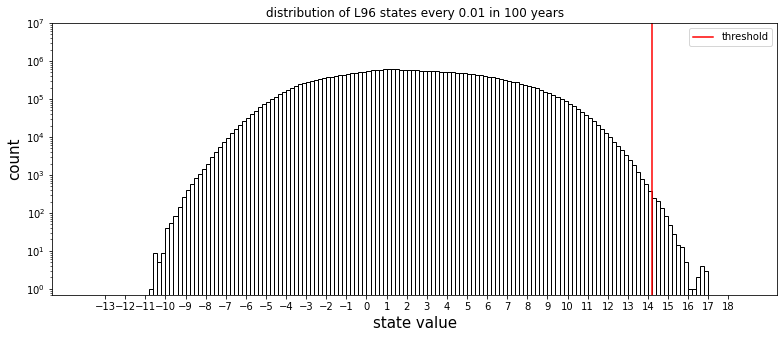

In [73]:

plt.figure(figsize = (13,5))
plt.hist(trajectory_flatten, bins = np.arange(-14,19,0.2),log = True, density = False, edgecolor = 'k', facecolor = 'None')
plt.xticks(np.arange(-13,19,1))
plt.ylim(1e0 - 0.3,1e7)
plt.axvline(x=threshold,color = 'r', label='threshold')
plt.xlabel('state value', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.legend(loc='best')
plt.title('distribution of L96 states every 0.01 in 100 years')
plt.savefig('hist_every01', bbox_inches = 'tight')
plt.show()


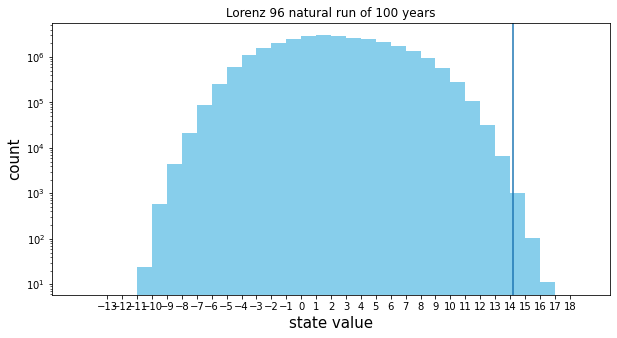

In [53]:
plt.figure(figsize = (10,5))
plt.hist(trajectory_flatten, bins = np.arange(-15,20,1),log = True,  color = 'skyblue')
plt.xticks(np.arange(-13,19,1))
plt.axvline(x=threshold)
plt.xlabel('state value', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.title('Lorenz 96 natural run of 100 years')
plt.savefig('hist_inter', bbox_inches = 'tight')
plt.show()


In [5]:
#store the global extreme values and the state and the time point
import pickle
num_extreme = 200
glo_max_threshold = trajectory_flat_sorted[-(int(num_extreme/2 + 0.0001) + 1)]
glo_min_threshold = trajectory_flat_sorted[int(num_extreme/2 + 0.0001)]

count = 0
glo_extreme_series = np.zeros((3,num_extreme))
for i in range(len(trajectory)):
    for j in range(len(trajectory[0,:])):
        if trajectory[i,j]>glo_max_threshold or trajectory[i,j]<glo_min_threshold:
            glo_extreme_series[:, count] = [trajectory[i,j], i+1, j]
            count = count + 1

glo_extreme_series = glo_extreme_series[:,np.argsort(glo_extreme_series[0, :])] # value, state number(from 1), time point(from zero)


with open("glo_extreme_series.txt", "wb") as fp:
    pickle.dump(glo_extreme_series, fp)


In [7]:
np.shape(glo_extreme_series)

(3, 200)

In [5]:
#consider each state seperately
min_threshold = np.zeros(40)
max_threshold = np.zeros(40)

for i in range(len(trajectory)):
    state_sorted = sorted(trajectory[i,:])
    min_threshold[i] = state_sorted[5]
    max_threshold[i] = state_sorted[-6]
    
print('max_threshold = ', max_threshold)
print('min_threshold = ', min_threshold)


max_threshold =  [13.84827843 13.91512255 14.00661622 13.76034818 13.82276547 13.94685478
 13.94273123 13.38979807 14.11298051 14.03876089 14.2122526  14.17400587
 14.1620408  14.16902484 14.31194613 13.55252504 14.36664005 13.6728851
 13.21097194 14.09488688 13.80979293 14.28697003 13.85315302 14.04125846
 13.78291655 13.77127257 14.15878924 13.99188584 13.8228229  13.7890458
 13.92853835 13.74916174 13.72008453 14.21657593 13.9310265  14.05628783
 14.04947415 13.4564034  13.68082348 13.65986561]
min_threshold =  [-8.89920821 -9.37817025 -8.61449688 -8.62827409 -8.68467626 -8.57829827
 -9.40020484 -9.24401331 -8.65473755 -8.49709052 -8.71791528 -8.91828876
 -8.88015951 -9.14726684 -8.16775255 -8.94730949 -9.00803727 -8.89400989
 -8.34833041 -8.19403252 -8.58729071 -8.58833839 -8.77412708 -8.86171483
 -9.02946755 -8.12867468 -8.56753615 -9.02852662 -8.48166556 -8.49800022
 -9.01195046 -8.57006665 -8.71780636 -8.40900267 -8.5348645  -8.86758587
 -8.62171045 -8.73616865 -8.43060653 -8.57

In [15]:
pp = sv.load('perturbation_history_step5_radius1_state1.txt')

In [5]:
#consider each state seperately
import pickle
extreme_series = np.zeros((40,2,10))

for i in range(len(trajectory)):
    count = 0
    for s in range(len(trajectory[i,:])):
        if trajectory[i,s] < min_threshold[i] or trajectory[i,s] > max_threshold[i]:
            extreme_series[i,0,count] = trajectory[i,s]
            extreme_series[i,1,count] = s
            count = count + 1
            #print(count)


print('extreme_series =', extreme_series)

#with open("extreme_series.txt", "wb") as fp:
#            pickle.dump(extreme_series, fp)

            
   
    

extreme_series = [[[ -9.00439591e+00  -9.26418511e+00   1.40720592e+01   1.41094966e+01
     1.38764263e+01  -8.94406885e+00  -9.03611593e+00  -8.99157823e+00
     1.42756833e+01   1.44212058e+01]
  [  9.47000000e+02   9.48000000e+02   7.83300000e+03   7.83400000e+03
     1.19820000e+04   4.86030000e+04   4.86040000e+04   6.46560000e+04
     1.25888000e+05   1.25889000e+05]]

 [[ -9.41948702e+00   1.41581479e+01   1.40888326e+01  -9.86758913e+00
    -9.96637310e+00   1.41375965e+01   1.41535431e+01  -9.82658892e+00
    -9.67321351e+00   1.39844735e+01]
  [  3.07750000e+04   4.02370000e+04   7.81450000e+04   9.46310000e+04
     9.46320000e+04   1.07920000e+05   1.07921000e+05   1.19304000e+05
     1.19305000e+05   1.21319000e+05]]

 [[ -9.02634664e+00  -8.81585524e+00  -8.93638281e+00  -9.46391405e+00
     1.42369279e+01   1.40559484e+01   1.40872534e+01   1.49999658e+01
     1.46412344e+01  -8.74505235e+00]
  [  9.07000000e+03   1.33690000e+04   7.58580000e+04   7.58590000e+04
     8.3

In [48]:

import numpy as np
import math

a = np.matrix([[1,2,3],[4,9,6]])
print(np.max(a))
b = np.argmax(a)
print((b+1)/3, (b+1)%3)
math.ceil(2.1)

9
1.66666666667 2


3

In [51]:
index_max = np.argmax(extreme_series[:,0,:])
index_min = np.argmin(extreme_series[:,0,:])
max_bulk = math.ceil((index_max+1)/10)
max_loc =  (index_max+1)%10
min_bulk = math.ceil((index_min+1)/10)
min_loc = (index_min+1)%10
print(max_bulk, max_loc,  min_bulk, min_loc)
print(extreme_series[max_bulk-1,:,max_loc-1])
print(extreme_series[min_bulk-1,:,min_loc-1])

20 8 7 5
[  1.55696044e+01   1.22724000e+05]
[ -1.06243509e+01   2.77910000e+04]


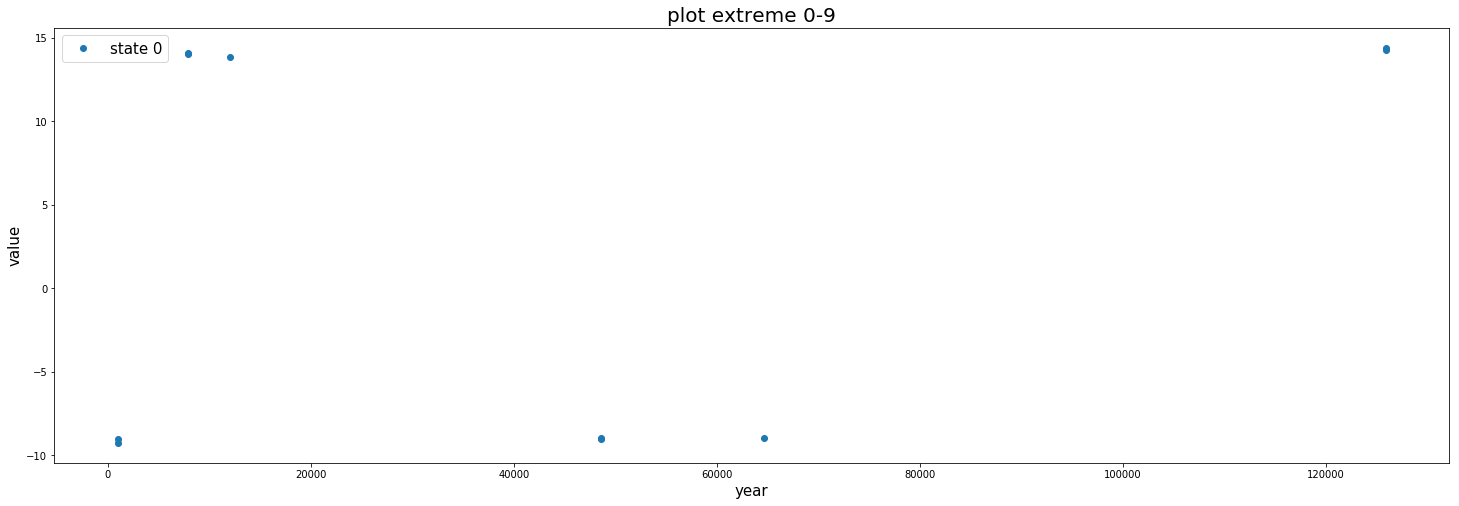

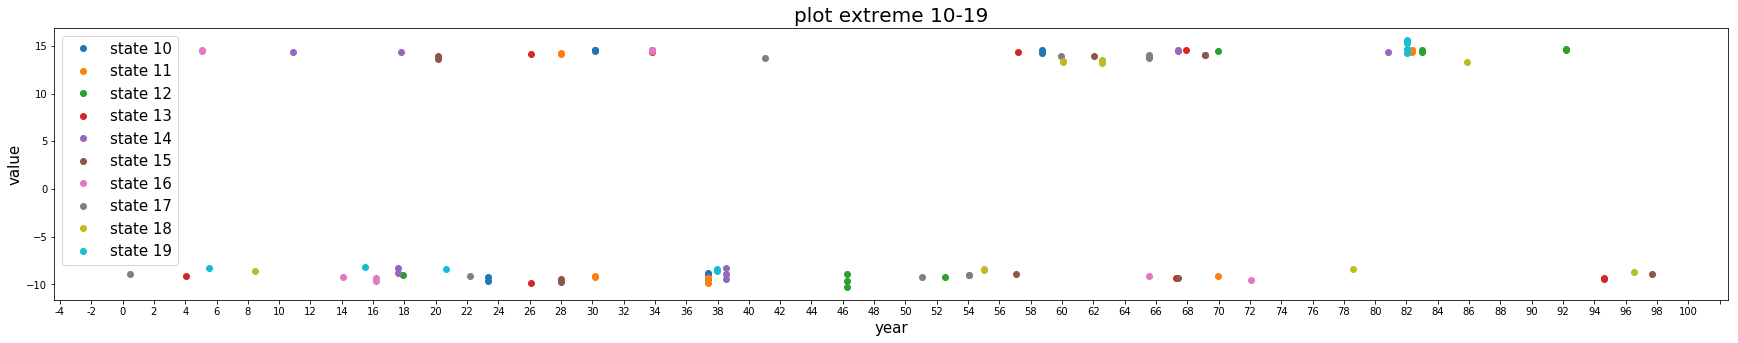

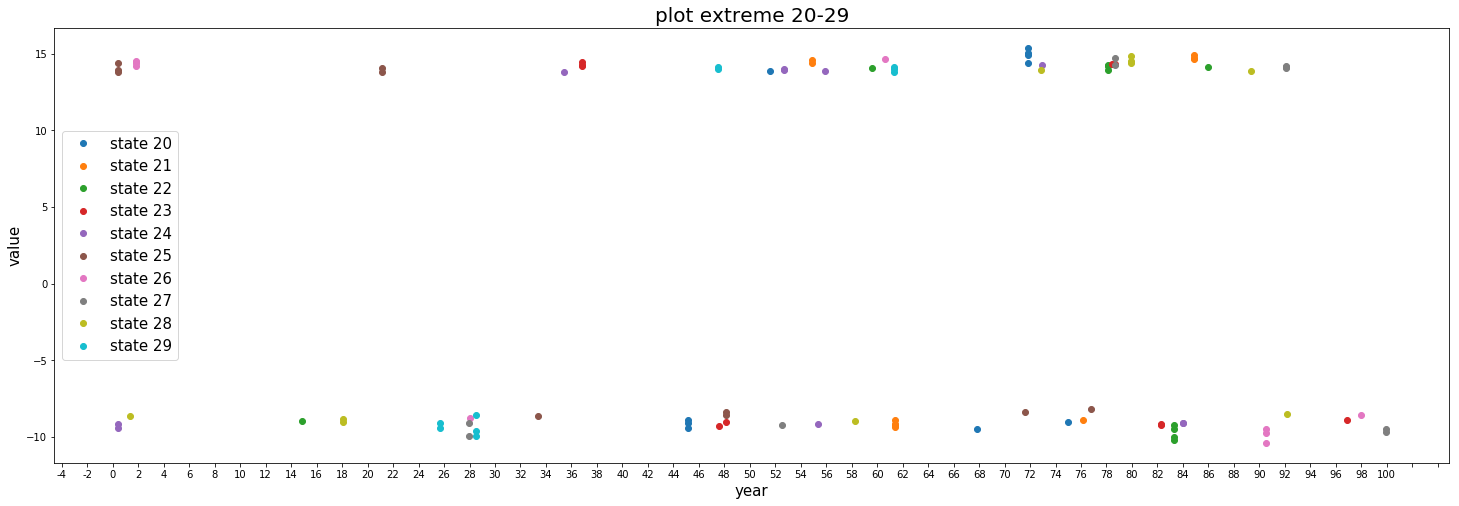

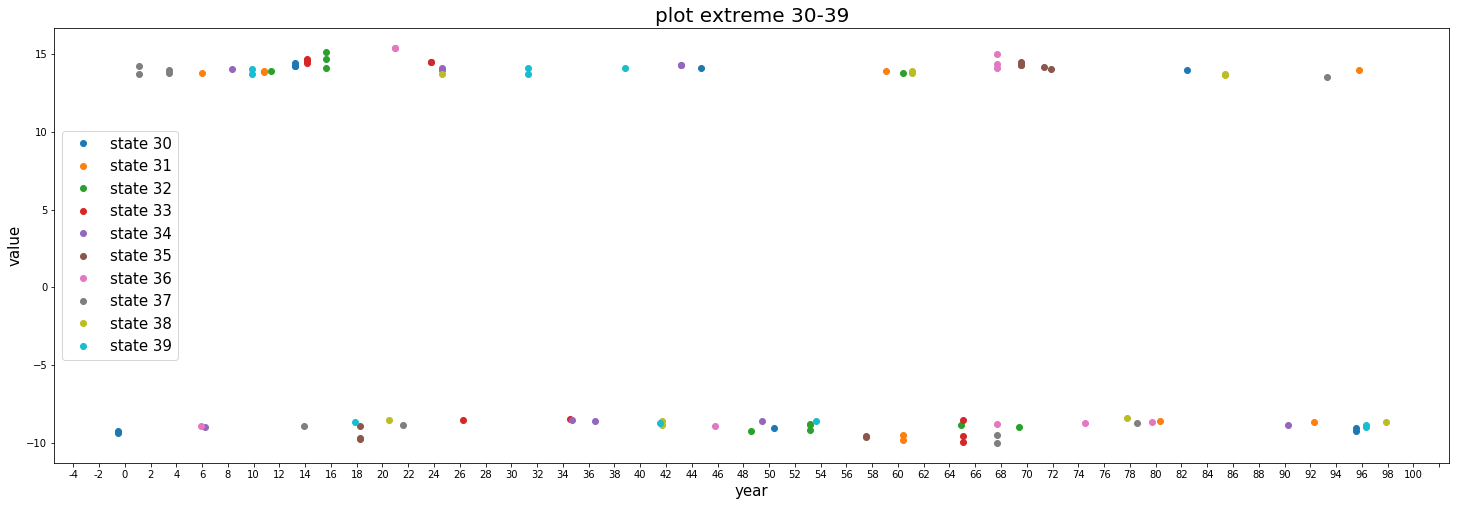

In [10]:
import pylab as pl
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
def extreme_plot_0_9(extreme_series, outfile = 'something', plot_title = 'something'):
    for i in range(0,1,1):
        plt.plot(extreme_series[i,1,:], extreme_series[i,0,:], linestyle = 'none', marker = 'o', label = 'state %s'%(i))
    plt.rcParams['figure.figsize'] = [30/1, 5/1]
    plt.xlabel('year', fontsize = 15)
    plt.ylabel('value', fontsize = 15)
    plt.title(plot_title, fontsize=20)
    #plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2920))
    #tick = np.arange(-2,101,2)
    #newXlabel = tick
    #pl.gca().set_xticklabels(newXlabel)
    plt.legend(loc='best', prop={'size': 15}) 
    plt.savefig(outfile)
    plt.show()
def extreme_plot_10_19(extreme_series, outfile = 'something', plot_title = 'something'):
    for i in range(10,20,1):
        plt.plot(extreme_series[i,1,:], extreme_series[i,0,:], linestyle = 'none', marker = 'o', label = 'state %s'%(i))
    plt.rcParams['figure.figsize'] = [25/1, 8/1]
    plt.xlabel('year', fontsize = 15)
    plt.ylabel('value', fontsize = 15)
    plt.title(plot_title, fontsize=20)
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2920))
    tick = np.arange(-6,101,2)
    newXlabel = tick
    pl.gca().set_xticklabels(newXlabel)
    plt.legend(loc='best', prop={'size': 15}) 
    plt.savefig(outfile)
    plt.show()
def extreme_plot_20_29(extreme_series, outfile = 'something', plot_title = 'something'):
    for i in range(20,30,1):
        plt.plot(extreme_series[i,1,:], extreme_series[i,0,:], linestyle = 'none', marker = 'o', label = 'state %s'%(i))
    plt.rcParams['figure.figsize'] = [25/1, 8/1]
    plt.xlabel('year', fontsize = 15)
    plt.ylabel('value', fontsize = 15)
    plt.title(plot_title, fontsize=20)
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2920))
    tick = np.arange(-6,101,2)
    newXlabel = tick
    pl.gca().set_xticklabels(newXlabel)
    plt.legend(loc='best', prop={'size': 15}) 
    plt.savefig(outfile)
    plt.show()

def extreme_plot_30_39(extreme_series, outfile = 'something', plot_title = 'something'):
    for i in range(30,40,1):
        plt.plot(extreme_series[i,1,:], extreme_series[i,0,:], linestyle = 'none', marker = 'o', label = 'state %s'%(i))
    plt.rcParams['figure.figsize'] = [25/1, 8/1]
    plt.xlabel('year', fontsize = 15)
    plt.ylabel('value', fontsize = 15)
    plt.title(plot_title, fontsize=20)
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2920))
    tick = np.arange(-6,101,2)
    newXlabel = tick
    pl.gca().set_xticklabels(newXlabel)
    plt.legend(loc='best', prop={'size': 15}) 
    plt.savefig(outfile)
    plt.show()
    
extreme_plot_0_9(extreme_series, outfile = 'extreme plot 0-9', plot_title = 'plot extreme 0-9')
extreme_plot_10_19(extreme_series, outfile = 'extreme plot 10-19', plot_title = 'plot extreme 10-19')
extreme_plot_20_29(extreme_series, outfile = 'extreme plot 20-29', plot_title = 'plot extreme 20-29')
extreme_plot_30_39(extreme_series, outfile = 'extreme plot 30-39', plot_title = 'plot extreme 30-39')
#plt.plot(extreme_series[1,1,6:9], extreme_series[1,0,6:9], marker = 'o')


In [716]:
# to check if the extreme values show in two states at the same time
from collections import Counter

time_extreme = glo_extreme_series[2,:].flatten()

data = Counter(time_extreme)
data.most_common(1) # return the most frequency element and its count

##no two states show extreme value at the same time (under the current extreme definition)

[(332000.0, 1)]

In [25]:
#local error growth
#should expore different spatial scales
import pickle
rescale_step_list = [5,10,20,40] # correspond to 6, 12, 24, 48 hours
per_amplitude_history = np.zeros((len(rescale_step_list), 2, 40)) # s r k

count = -1
for s in rescale_step_list:
    count = count + 1
    for r in range(1,3,1): #set the range of spatial scale
        perturbation_forecast_amplitude_hist= np.zeros((40, len(trajectory[0,:])))
        perturbation_expand_forecast_hist= np.zeros((40, 2*r + 1 + 3, len(trajectory[0,:])))
        for k in range(40):
            x0 = trajectory[:,0]
            per = np.random.normal(0,1, 2*r+1) #generate a perturbation vector
            per_amplitude = np.linalg.norm(per) #compute the amplitude of the perturbation
            per_amplitude_history[count, r-1, k] = per_amplitude #store perturbation amplitudes
            #print('perturbation = ', per)
            print('perturbation_amplitude =', per_amplitude)
            
            for p in range(k-r,k+r+1,1):
                x0[(p+40)%40] = x0[(p+40)%40] + per[p-(k-r)] #apply perturbation vector on the corresponding states
            
            perturbation_history = np.zeros((2*r + 1, len(trajectory[0,:])))
            perturbation_history[:, 0] = per
            perturbation_expand_history = np.zeros((2*r + 1 + 3, len(trajectory[0,:])))
            col = 0
            for i in range(0, len(trajectory[0,:])-int(s/5 + 0.0001), int(s/5 + 0.0001)):
                
                t_compute = np.arange(i, i + int(s/5 + 0.0001) + 0.3, 0.2)
                for l in range(len(t_compute)):
                    t_compute[l] = int(100*(t_compute[l] / 20)+0.1)/100
                
                output = np.arange(i, i + int(s/5 +0.0001) +0.3, int(s/5+ 0.0001))
                for l in range(len(output)):
                    output[l] = int(100*(output[l] / 20)+0.1)/100
                
                perturbed_forecast = smd.run(x0, t_compute, output)
                perturbed_forecast = perturbed_forecast.y
                
                col = col + int(s/5+ 0.001)
                x0 = trajectory[:,col]
                per_all = perturbed_forecast[:, -1] - x0
                per_local = np.zeros((2*r+1))
                per_local_expand = np.zeros((2*r+1 + 3))
                for p in range(k-r,k+r+1,1):
                    per_local[p -(k-r)] = per_all[(p+40)%40]
                
                for p in range(k-r-1,k+r+1+2,1):
                    per_local_expand[p -(k-r-1)] = per_all[(p+40)%40]
                    
                perturbation_history[:, i + int(s/5 + 0.0001)] = per_local    
                perturbation_expand_history[:, i + int(s/5 + 0.0001)] = per_local_expand
                per_local_amplitude = np.linalg.norm(per_local)
                per_local_rescale = per_local * (per_amplitude / per_local_amplitude)               
                perturbation_forecast_amplitude_hist[k, i+ int(s/5+0.0001)] = per_local_amplitude
                for p in range(k-r,k+r+1,1):
                    x0[(p+40)%40] = x0[(p+40)%40] + per_local_rescale[p-(k-r)]
            perturbation_expand_forecast_hist[k, :, :] = perturbation_expand_history
    
        with open("perturbation_amplitude_history_step%s_radius%s.txt"%(s, r), "wb") as fp:
            pickle.dump(perturbation_forecast_amplitude_hist, fp)
        with open("perturbation_expand_history_step%s_radius%s.txt"%(s, r), "wb") as fp:
            pickle.dump(perturbation_expand_forecast_hist, fp)
        with open("per_amplitude_history.txt", "wb") as fp:
            pickle.dump(per_amplitude_history, fp)
            




perturbation_amplitude = 1.02164619699
perturbation_amplitude = 1.41191626624
perturbation_amplitude = 1.85892575351
perturbation_amplitude = 0.765977039831
perturbation_amplitude = 2.50664963646
perturbation_amplitude = 1.62576355165
perturbation_amplitude = 1.31787018902
perturbation_amplitude = 1.390835307
perturbation_amplitude = 1.91791734845
perturbation_amplitude = 1.35458581581
perturbation_amplitude = 2.19195467182
perturbation_amplitude = 1.80933704376
perturbation_amplitude = 2.49161006045
perturbation_amplitude = 1.13799968861
perturbation_amplitude = 1.97763935674
perturbation_amplitude = 0.284336252365
perturbation_amplitude = 1.29055619941
perturbation_amplitude = 1.13505829219
perturbation_amplitude = 1.55036099399
perturbation_amplitude = 1.93450067346
perturbation_amplitude = 0.779919835705
perturbation_amplitude = 0.542956884271
perturbation_amplitude = 1.71322182251
perturbation_amplitude = 0.921601196651
perturbation_amplitude = 0.69294575952
perturbation_amplitude

perturbation_amplitude = 2.37132757564
perturbation_amplitude = 2.77289481087
perturbation_amplitude = 2.48817971478
perturbation_amplitude = 2.78374566301
perturbation_amplitude = 1.87392633432
perturbation_amplitude = 1.05865664562
perturbation_amplitude = 1.78828221946
perturbation_amplitude = 1.90045231867
perturbation_amplitude = 1.24511956653
perturbation_amplitude = 2.06930103191
perturbation_amplitude = 1.93795776003
perturbation_amplitude = 2.35926063391
perturbation_amplitude = 1.62951978654
perturbation_amplitude = 2.03512941317
perturbation_amplitude = 2.17683283353
perturbation_amplitude = 1.81859821955
perturbation_amplitude = 1.05069737854
perturbation_amplitude = 3.23987332909
perturbation_amplitude = 1.74437982929
perturbation_amplitude = 2.63477847293
perturbation_amplitude = 0.981351367893
perturbation_amplitude = 2.7174924868
perturbation_amplitude = 2.34093920713
perturbation_amplitude = 1.30777777054
perturbation_amplitude = 2.98146172914
perturbation_amplitude = 

In [717]:
#after 25th Sep 2020 discussion
#local error growth

import pickle
import numpy as np
rescale_step_list = [5]    #rescale steps, 5 is 6h, 10 is 12h, 20 is 24h, etc
radius_list = range(2,3,1) #space localization radius
#per_amplitude_history = np.zeros((len(rescale_step_list), len(radius_list), 40)) # s r k
n_ens  = 5
all_bred_vector = np.zeros((n_ens,40,len(trajectory[0,:])))

for c in range(n_ens):
    count = -1
    track = 0
    #np.random.seed(123+c)
    per = np.random.normal(0, 1, 40)    #generate a global perturbation vector

    per_amplitude = np.linalg.norm(per) #compute the amplitude of the perturbation

    for s in rescale_step_list:
        count = count + 1
        for r in radius_list: #set the range of spatial scale
            perturbation_forecast_amplitude_hist= np.zeros((40, len(trajectory[0,:])))
            bred_vector_hist = np.zeros((40, 40, len(trajectory[0,:])))

            #perturbation_expand_forecast_hist= np.zeros((40, 2*r + 1 + 3, len(trajectory[0,:])))
            
            for k in range(19,20):
                track= track +1
                print(track)
                x0 = trajectory[:,0] # each cycle we use the same inital value and then plus a perturbation
                x0 = x0 + per        
                #for p in range(k-r,k+r+1,1):
                #    x0[(p+40)%40] = x0[(p+40)%40] + per[p-(k-r)] #apply perturbation vector on the corresponding states
                #perturbation_expand_history = np.zeros((2*r + 1 + 3, len(trajectory[0,:])))
                perturbation_history = np.zeros((2*r + 1, len(trajectory[0,:])))
                #col = 0
                for i in range(0, len(trajectory[0,:])-int(s/5 + 0.0001), int(s/5 + 0.0001)):

                    t_compute = np.arange(i, i + int(s/5 + 0.0001) + 0.1, 0.2)
                    for l in range(len(t_compute)):
                        t_compute[l] = int(100*(t_compute[l] / 20)+0.1)/100

                    output = np.arange(i, i + int(s/5 +0.0001) +0.3, 1)
                    for l in range(len(output)):
                        output[l] = int(100*(output[l] / 20)+0.1)/100

                    perturbed_forecast = smd.run(x0, t_compute, output)
                    perturbed_forecast = perturbed_forecast.y


                    x0 = trajectory[:,i+int(s/5+ 0.001)]
                    x_truth = trajectory[:,i+1:i+int(s/5+ 0.001)+1] 
                    #x_truth = trajectory[:,col-(int(s/5+ 0.001)-1):col+1]            
                    per_all = perturbed_forecast[:, 1:] - x_truth              
                    per_local = np.zeros((2*r+1,len(per_all[0,:])))
                    bred_vector_hist[k,:, i +1 : i+int(s/5+ 0.001)+1] = per_all
                    #per_local_expand = np.zeros((2*r+1 + 3))
                    for l in range(len(per_all[0,:])):     
                        for p in range(k-r,k+r+1,1):
                            per_local[p -(k-r),l] = per_all[(p+40)%40,l]
                    initial_per_local = np.zeros(2*r+1)
                    for p in range(k-r,k+r+1,1):
                        initial_per_local[p -(k-r)] = per[(p+40)%40]
                    initial_per_local_amplitude = np.linalg.norm(initial_per_local)



                    #for p in range(k-r-1,k+r+1+2,1):
                    #    per_local_expand[p -(k-r-1)] = per_all[(p+40)%40]    
                    perturbation_history[:, i + 1 : i + int(s/5 + 0.0001)+1] = per_local    
                    #perturbation_expand_history[:, i + int(s/5 + 0.0001)] = per_local_expand

                    per_local_amplitude = np.linalg.norm(per_local, axis = 0)
                    per_all_amplitude = np.linalg.norm(per_all, axis = 0)

                    #per_all_rescale = per_all[:,-1] * (initial_per_local_amplitude / per_local_amplitude[-1])
                    per_all_rescale = per_all[:,-1] * (per_amplitude / per_all_amplitude[-1])

                    perturbation_forecast_amplitude_hist[k, i + 1 : i + int(s/5 + 0.0001)+1] = per_local_amplitude
                    
                    x0 = x0 + per_all_rescale
                #perturbation_expand_forecast_hist[k, :, :] = perturbation_expand_history

            with open("perturbation_amplitude_history_step%s_radius%s_per%s.txt"%(s, r, c), "wb") as fp:
                pickle.dump(perturbation_forecast_amplitude_hist, fp)
            with open("bred_vector_history_step%s_radius%s_per%s.txt"%(s, r, c), "wb") as fp:
                pickle.dump(bred_vector_hist, fp)
            all_bred_vector[c,:,:] = bred_vector_hist[k,:,:]
            #with open("perturbation_expand_history_step%s_radius%s.txt"%(s, r), "wb") as fp:
            #    pickle.dump(perturbation_expand_forecast_hist, fp)
            #with open("per_amplitude_history.txt", "wb") as fp:
            #    pickle.dump(per_amplitude_history, fp)

            




1
1
1
1
1


In [718]:
with open("all_bred_vector_step%s_radius%s.txt"%(s, r), "wb") as fp:
                pickle.dump(all_bred_vector, fp)

In [732]:
repeat = 1
diff = np.zeros((repeat,len(glo_extreme_series[0,:])))
ccount = 0
for v in range(repeat):
    print(ccount)
    local_bv = np.zeros((40,5,n_ens))
    delay_steps = 0
    BV_dim_series = np.zeros((delay_steps + 1,len(glo_extreme_series[0,:]),40))
    random_time = np.random.randint(delay_steps,146000,len(glo_extreme_series[0,:]))
    while (np.in1d(random_time, glo_extreme_series[2,:])).any():
        random_time = np.random.randint(delay_steps,146000,len(glo_extreme_series[0,:]))
    for k in np.arange(delay_steps, -1, -1):
        for s in range(len(glo_extreme_series[0,:])):
            time = glo_extreme_series[2,s]

            for i in range(40):
                for p in range(i-2,i+2+1,1):
                    local_bv[i, p -(i-2),:] = all_bred_vector[:,(p+40)%40,int(time+0.0001)-k] # extreme value time point
                    #local_bv[i, p -(i-2),:] = all_bred_vector[:,(p+40)%40, random_time[s] -k] # normal value random time point


            #nomalize the column of local_bv to unit norm
            for i in range(40):
                for j in range(n_ens):
                    local_bv[i,:,j] = local_bv[i,:,j]/np.linalg.norm(local_bv[i,:,j])

            local_bv_cor = np.zeros((40, n_ens, n_ens))
            for i in range(40):
                local_bv_cor[i,:,:] = np.dot(local_bv[i,:,:].T,local_bv[i,:,:])

            eigenval = np.zeros((40, n_ens))
            for i in range(40):
                lamda,P = np.linalg.eigh(local_bv_cor[i,:,:]) 
                eigenval[i,:] = lamda


            for i in range(40):
                for j in range(n_ens):
                    if abs(eigenval[i,j])<0.0000000001:
                        eigenval[i,j] = 0

            sig_val = np.sqrt(eigenval)

            #compute the BV-dimension
            BV_dim = np.zeros(40)
            for i in range(40):
                BV_dim[i] = np.square(sum(sig_val[i,:]))/sum(np.square(sig_val[i,:]))

            BV_dim_series[delay_steps-k,s,:] = BV_dim
            '''
            plt.plot(range(1,41,1), BV_dim, label = 'BV-dimension for each state')
            plt.title('BV-dimension -%s hour'%(k*6))
            plt.xlabel('state',fontsize = 14)
            plt.ylabel('BV-dimension',fontsize = 14)
            plt.ylim(0.5,3)
            plt.xticks(range(1,41,2))
            plt.grid(color = 'grey', linestyle = ':', linewidth = 0.5)
            plt.vlines(int(glo_extreme_series[1,s]+0.0001)-1,ymin = 0.5, ymax = 3, label = 'state with extreme value')
            plt.legend(loc = 'best', fontsize = 14)
            plt.savefig('bv_dim_no%s_%s_h'%(s,6*k))
            plt.show()
            '''

    #apap = np.mean(BV_dim_series[0:-1,:,:], axis = 0)
    #normal_ave_bv_dim = np.zeros(10)
    #for i in range(10):
    #    normal_ave_bv_dim[i] = apap[i,int(glo_extreme_series[1,i]+0.001)]
    #diff[v,:] = normal_ave_bv_dim - extreme_ave_bv_dim
    ccount = ccount + 1

0


In [604]:
# not clear how to use this!
count_positive = np.zeros(len(glo_extreme_series[0,:]))
for i in range(repeat):
    for j in range(len(glo_extreme_series[0,:])):
        if diff[i,j]>0:
            count_positive[j] = count_positive[j]+1
print(count_positive/1000)

[0.929 0.976 0.979 0.354 0.927 0.254 0.88  0.373 0.877 0.228]


In [550]:
# not clear how to use this!
#normal time point
#print(BV_dim_series[0:-1,0,0])
apap = np.mean(BV_dim_series[0:-1,:,:], axis = 0)
#print(apap)
normal_ave_bv_dim = np.zeros(len(glo_extreme_series[0,:]))
for i in range(len(glo_extreme_series[0,:])):
    normal_ave_bv_dim[i] = apap[i,int(glo_extreme_series[1,i]+0.001)]
print(normal_ave_bv_dim)
print(normal_ave_bv_dim - extreme_ave_bv_dim)

[1.50160406 1.64764258 1.85925957 1.22425514 1.37476243 2.38516257
 1.87878963 1.20803912 1.11899629 1.94103349]
[ 0.2861148   0.49425471  0.70599647 -0.54117976  0.15821871  0.53512714
  0.59376904 -0.52283736 -0.15687233  0.08735964]


In [511]:
# not clear how to use this!
import copy
#extreme time point
#print(BV_dim_series[0:-1,0,0])
ex_apap = np.mean(BV_dim_series[0:-1,:,:], axis = 0)
#print(apap)
extreme_ave_bv_dim = np.zeros(len(glo_extreme_series[0,:]))
for i in range(len(glo_extreme_series[0,:])):
    extreme_ave_bv_dim[i] = ex_apap[i,int(glo_extreme_series[1,i]+0.001)]
print(extreme_ave_bv_dim)

[1.21548927 1.15338787 1.1532631  1.7654349  1.21654371 1.85003543
 1.28502059 1.73087648 1.27586862 1.85367385]


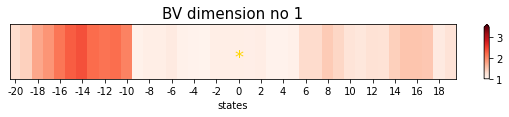

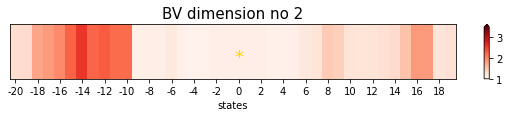

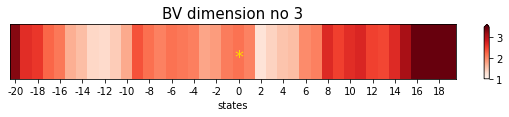

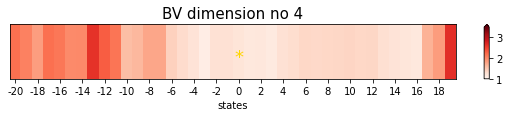

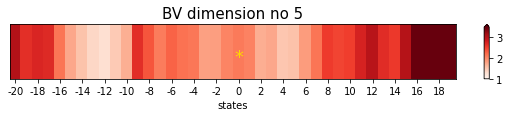

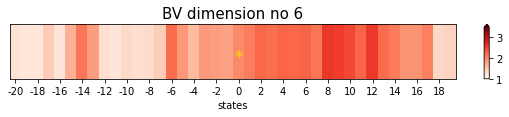

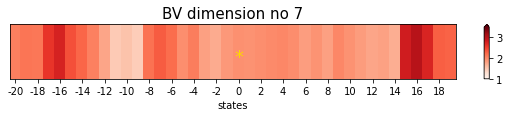

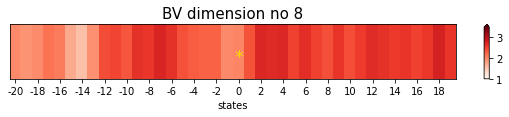

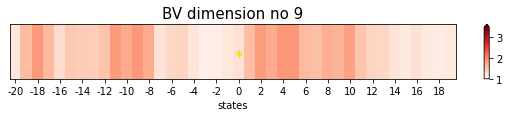

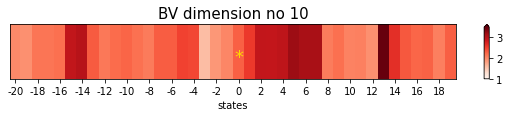

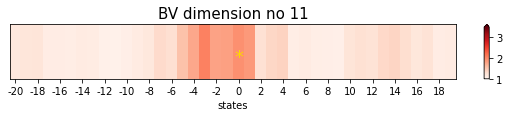

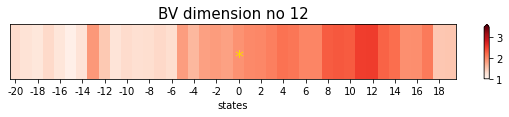

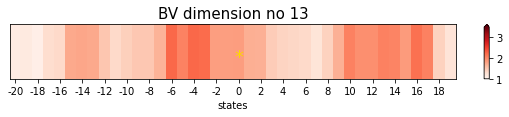

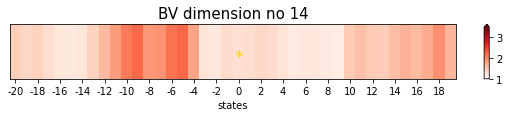

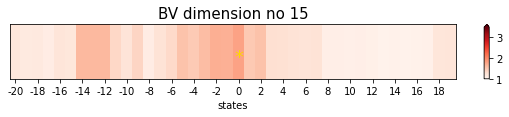

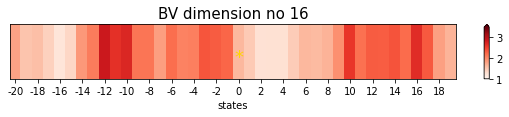

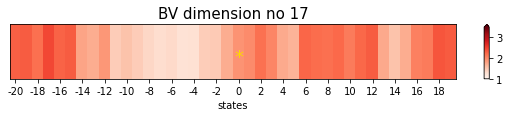

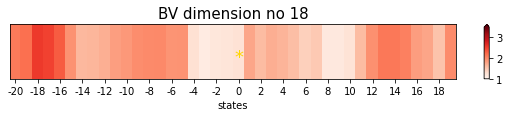

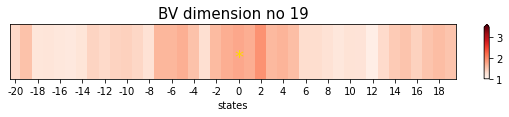

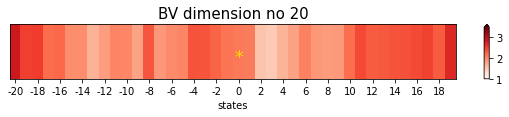

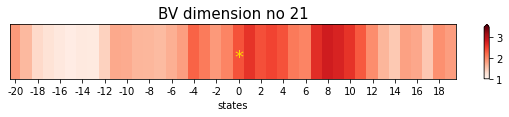

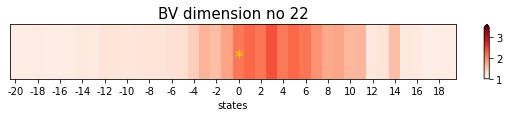

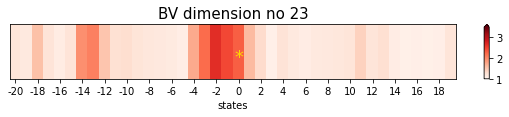

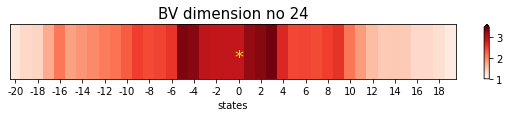

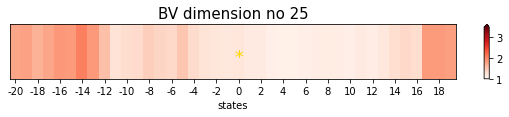

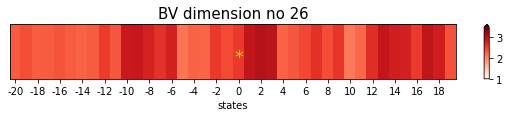

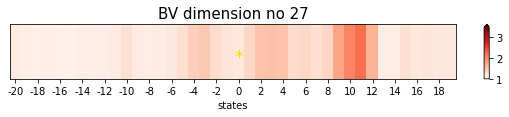

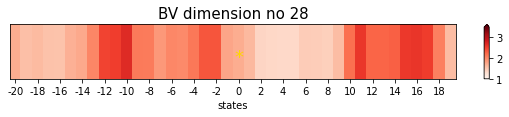

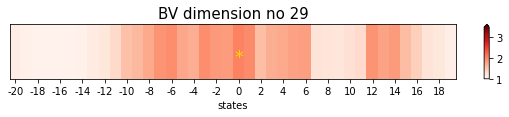

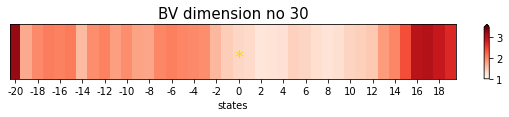

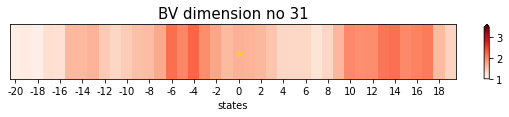

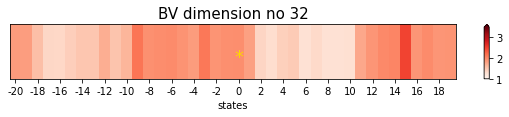

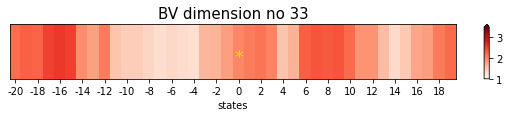

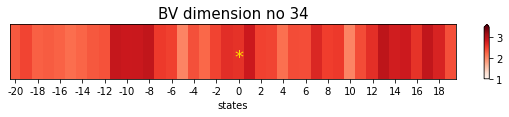

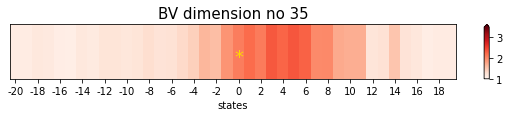

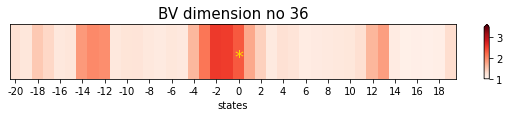

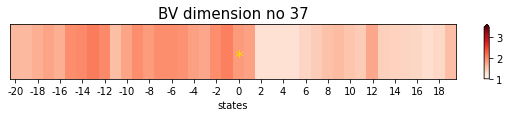

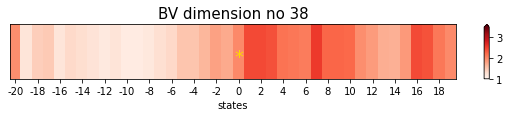

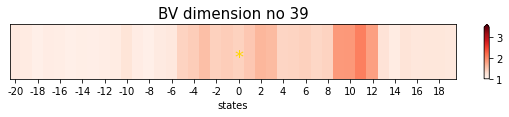

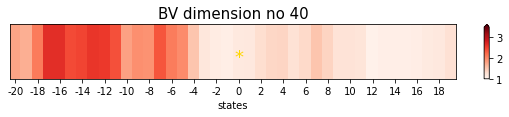

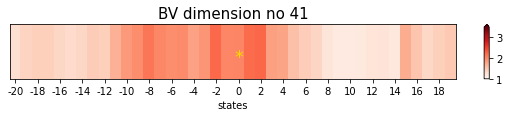

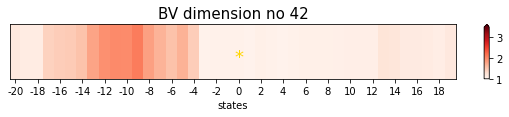

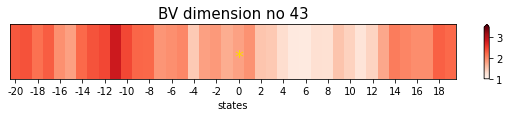

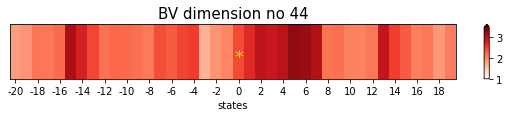

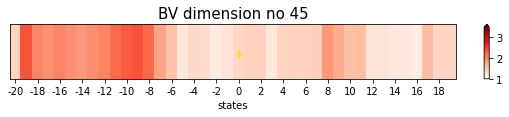

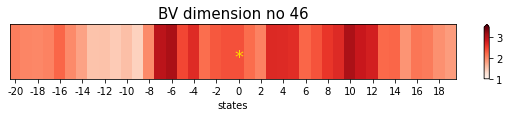

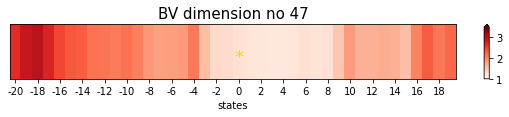

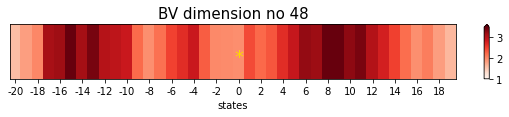

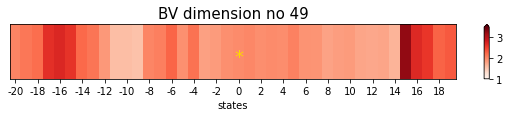

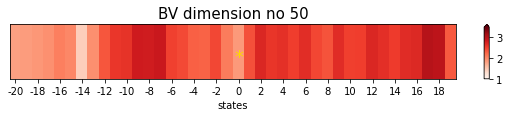

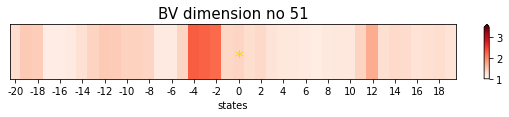

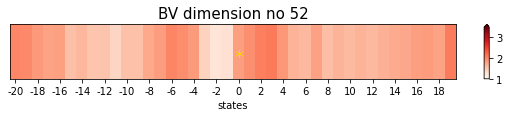

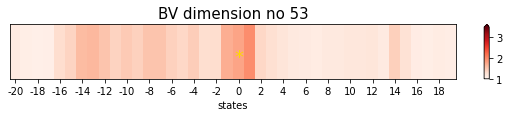

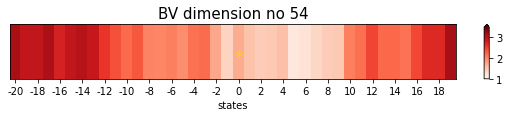

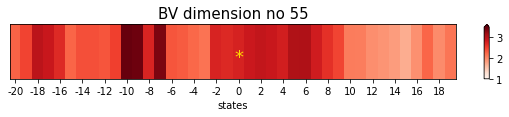

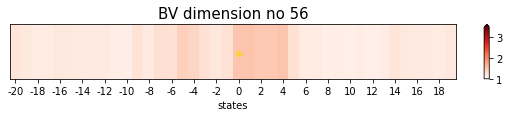

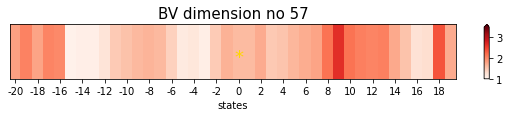

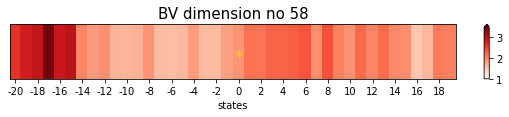

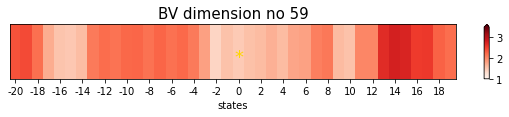

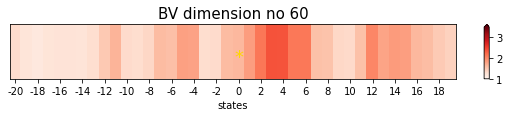

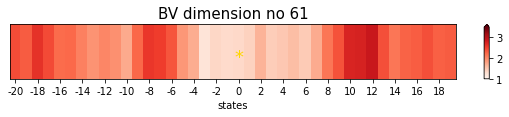

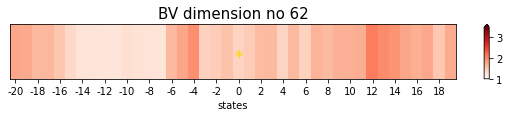

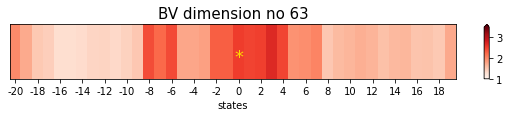

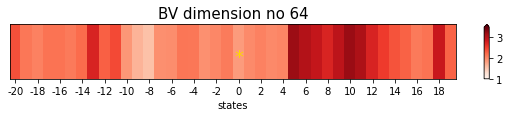

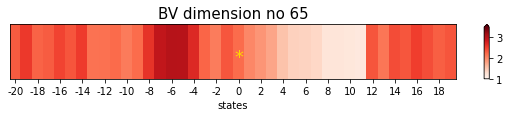

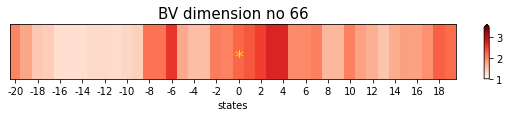

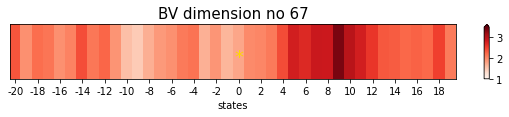

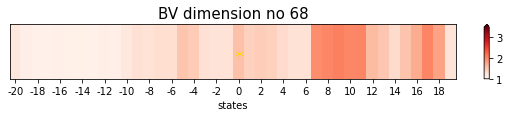

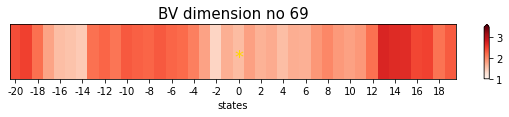

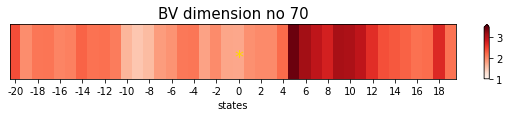

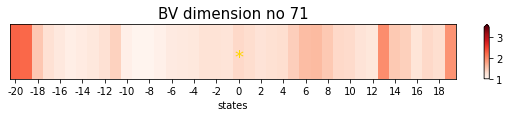

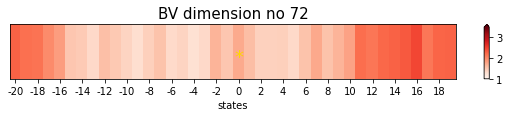

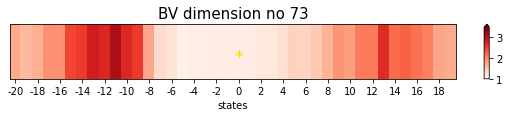

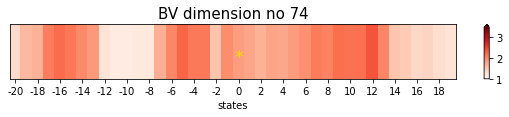

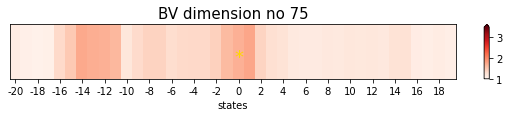

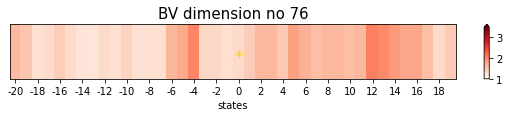

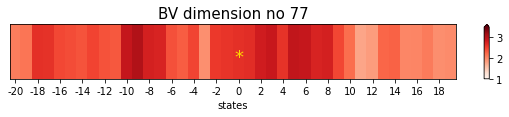

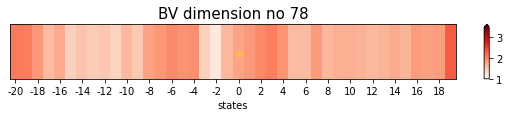

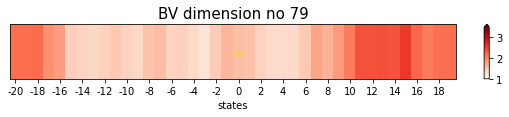

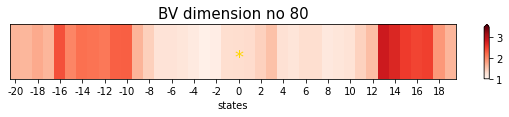

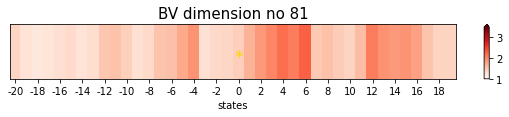

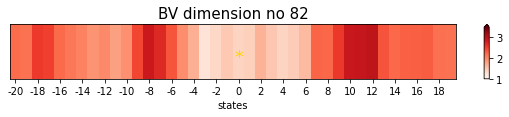

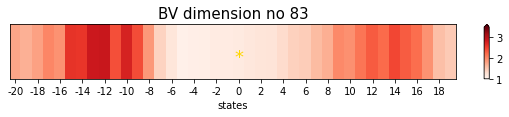

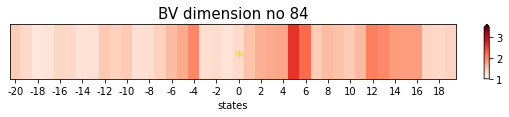

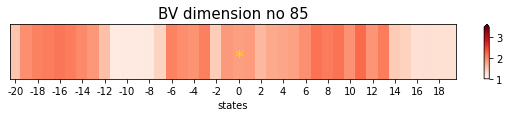

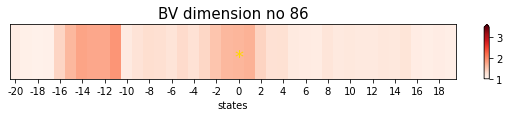

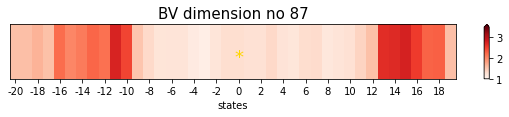

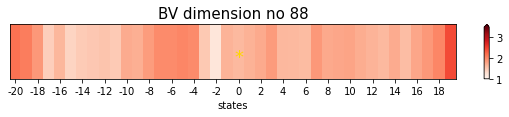

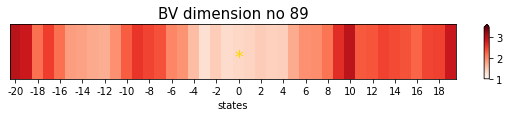

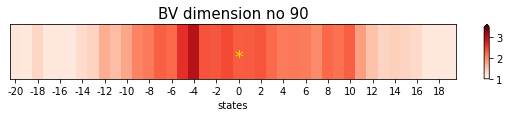

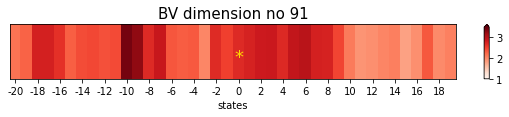

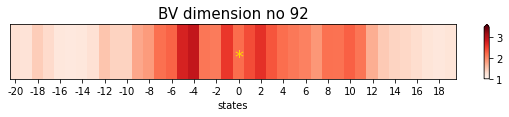

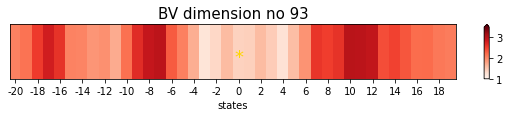

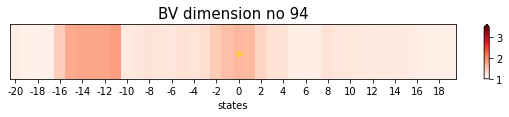

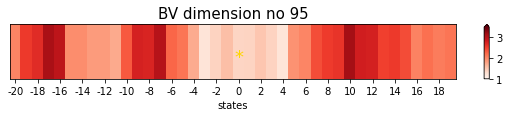

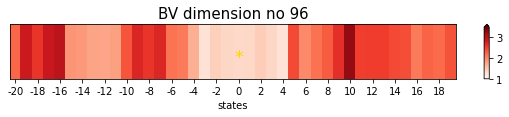

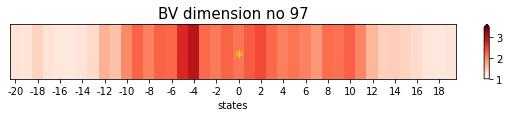

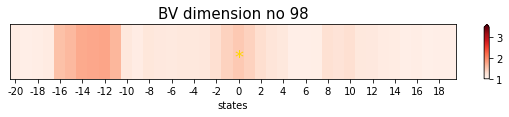

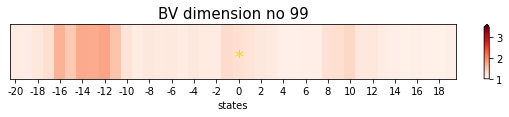

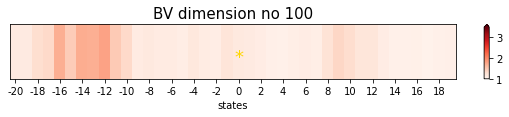

In [733]:
#extreme value
for i in range(len(glo_extreme_series[0,:])):
    fig, ax = plt.subplots(figsize= (10,1))
    BV_dim_series_shift = np.zeros((delay_steps+1,40))
    state_tick = glo_extreme_series[1,i].astype(int)
    for p in range(state_tick-20,state_tick+20,1):
        BV_dim_series_shift[:,p-(state_tick-20)] = BV_dim_series[:, i, (p-1+40)%40]
    im = ax.pcolor(BV_dim_series_shift, cmap = 'Reds', vmin = 1, vmax = 3.5)
    for j in range(delay_steps +1):
        plt.text(20 + 0.1, j + 0.3,'*',color = 'gold', fontsize = 18)
    fig.colorbar(im, extend = 'max', aspect = 10)
    ax.set_xlabel('states')
    ax.set_title("BV dimension no %s"%(i+1), size = 15)
    ax.xaxis.set(ticks = np.arange(0.5,40,2), ticklabels = np.arange(-20,20,2))
    #ax.yaxis.set(ticks = np.arange(0.5,delay_steps + 1,2), ticklabels = np.arange(6*delay_steps,-12,-12))
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(axis = 'y', which = 'both',length = 0)
    plt.savefig('extreme_BV_dim%s'%(i+1),bbox_inches='tight')
    plt.show()


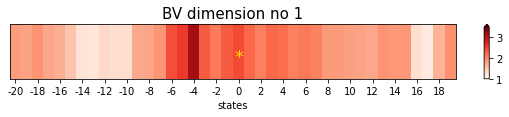

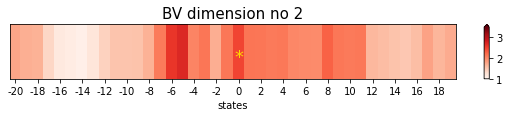

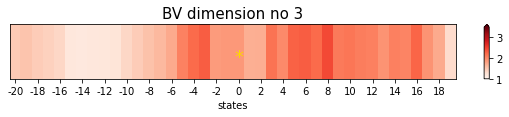

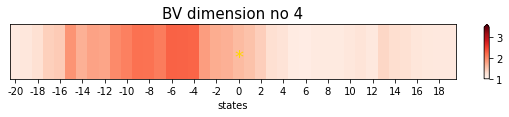

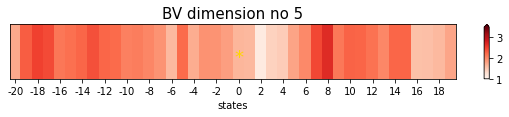

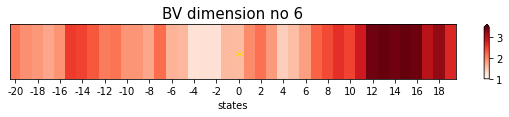

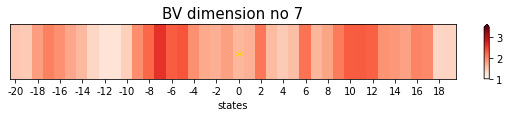

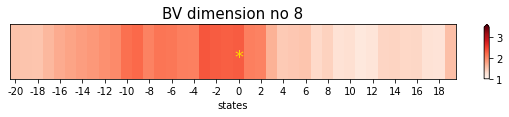

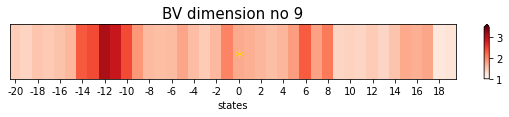

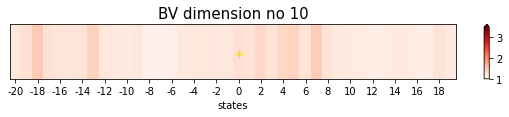

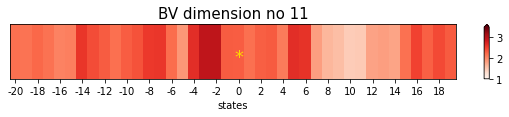

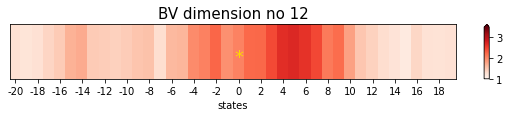

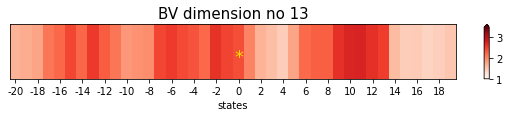

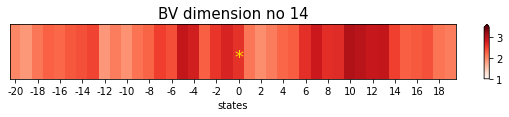

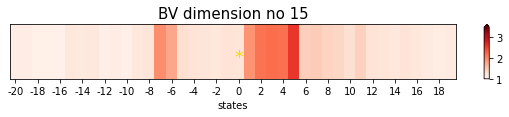

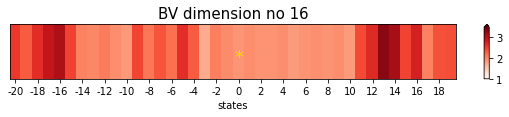

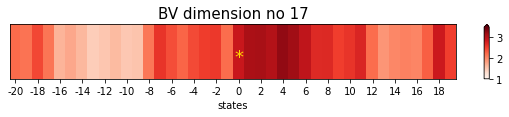

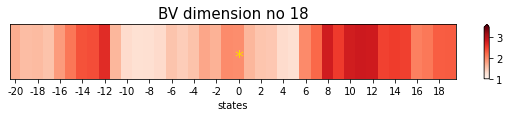

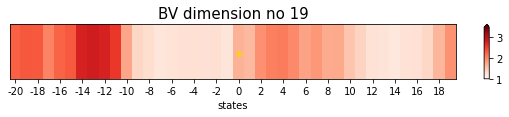

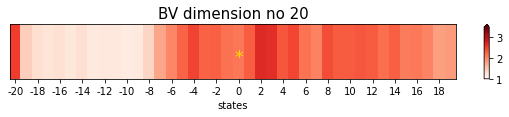

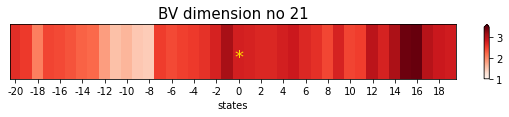

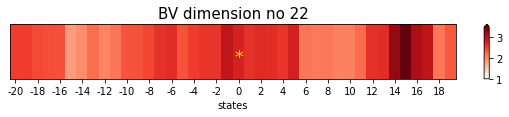

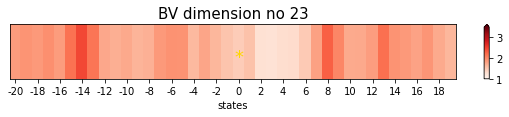

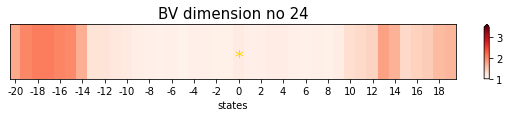

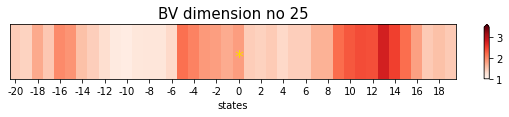

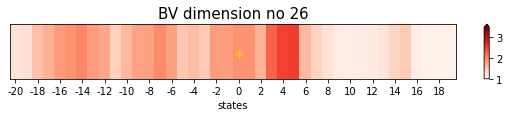

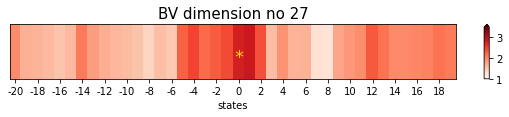

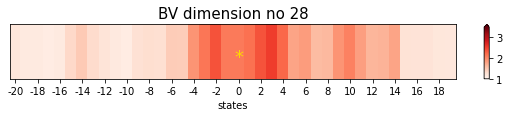

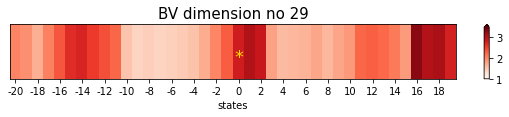

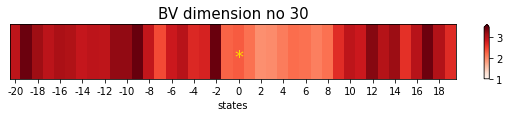

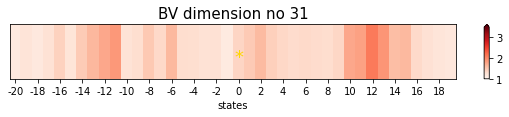

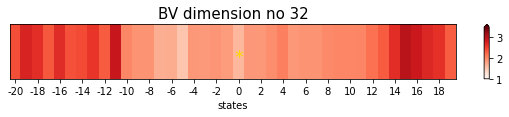

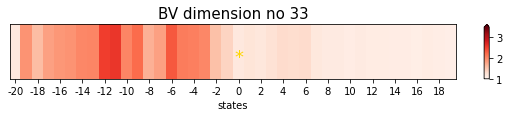

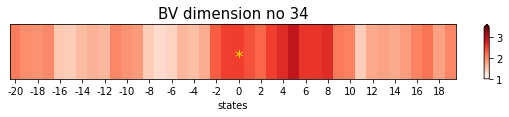

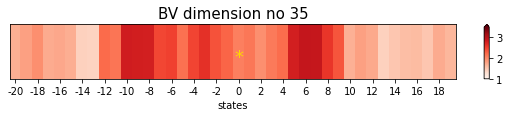

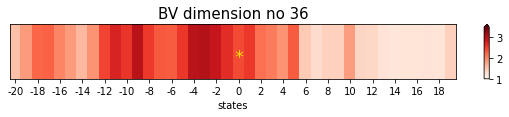

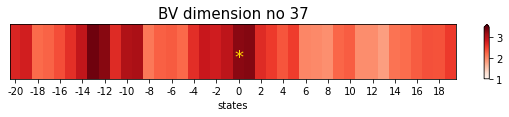

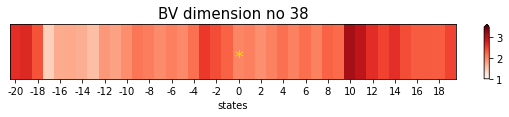

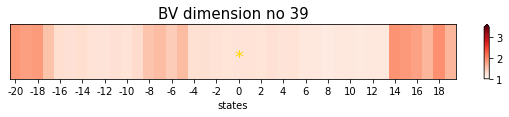

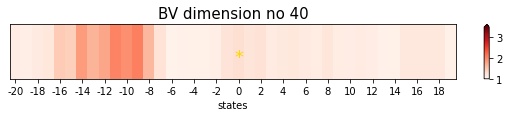

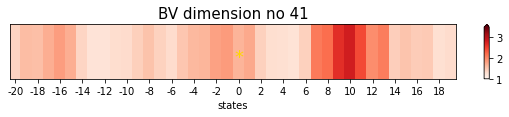

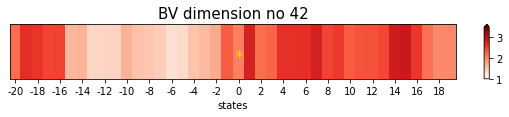

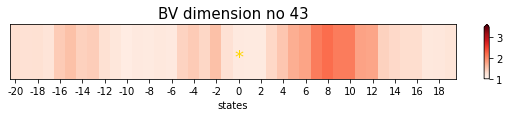

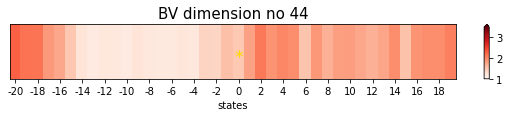

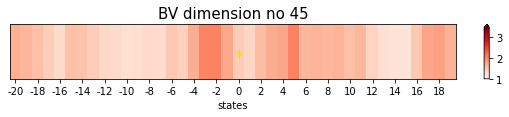

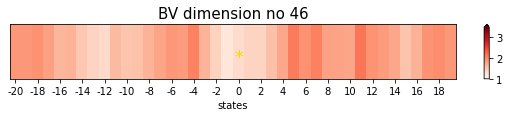

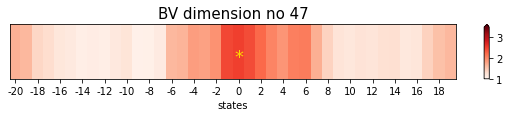

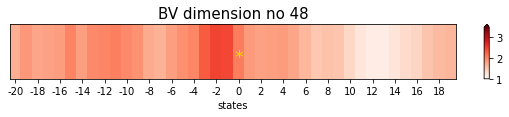

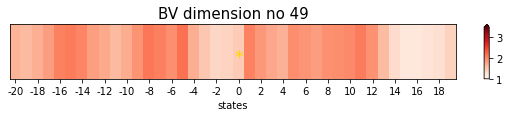

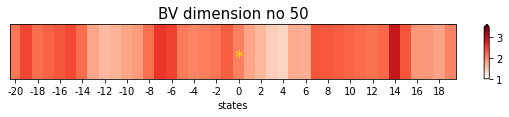

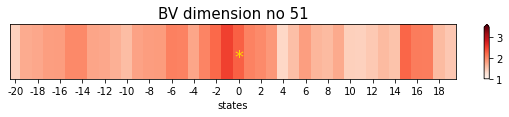

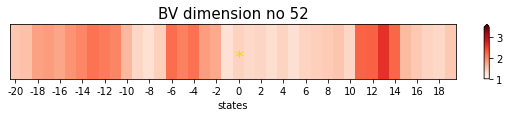

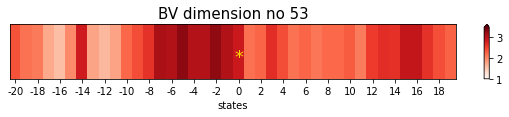

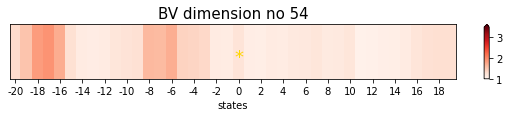

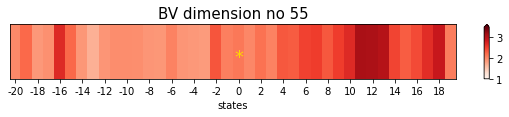

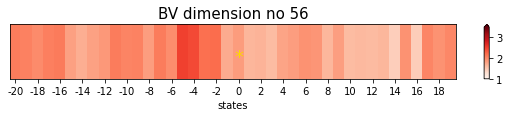

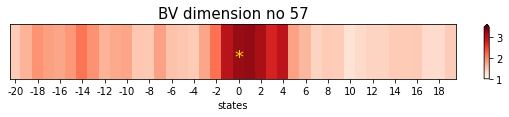

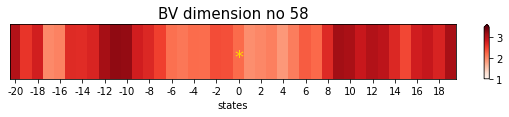

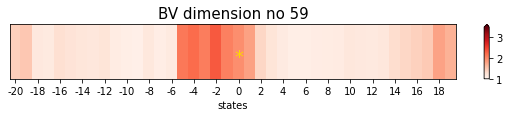

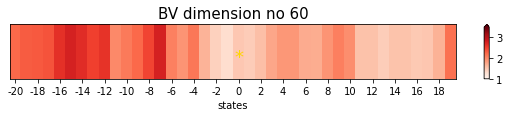

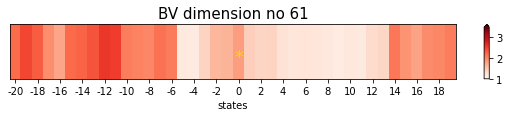

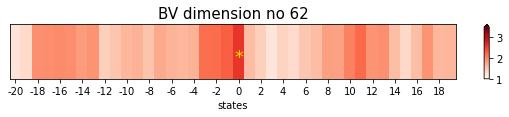

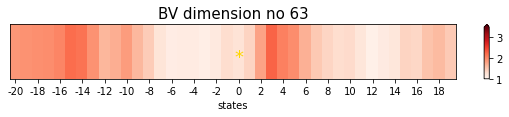

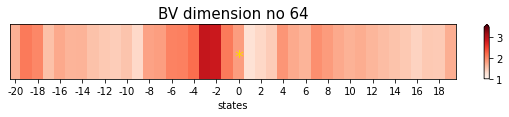

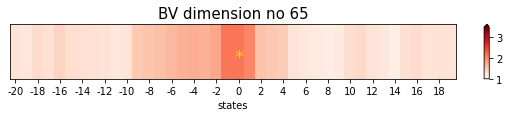

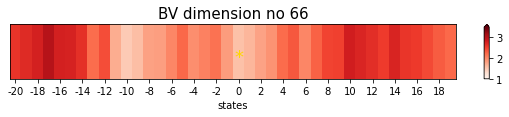

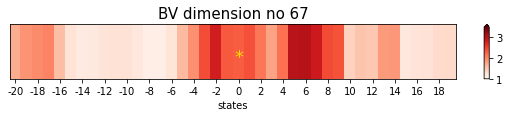

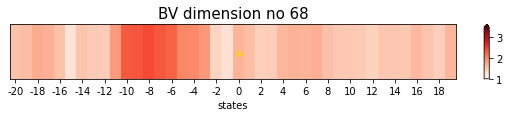

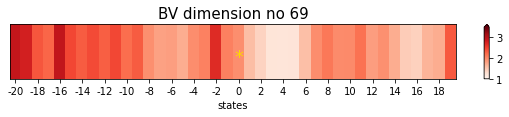

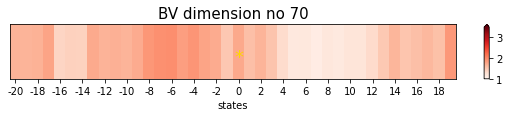

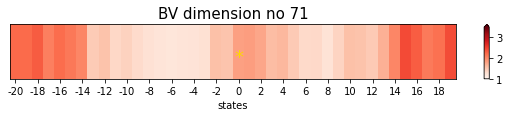

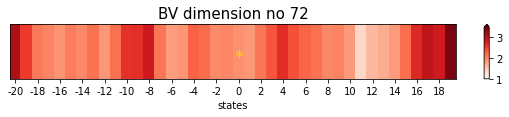

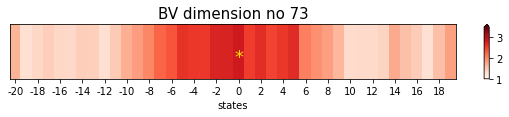

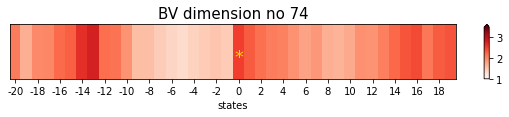

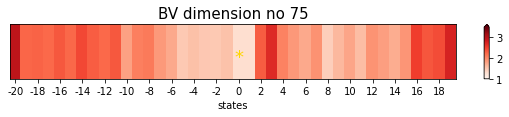

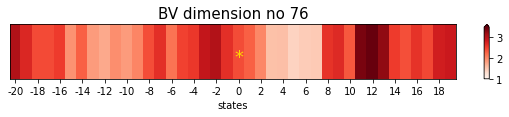

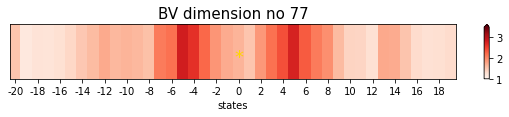

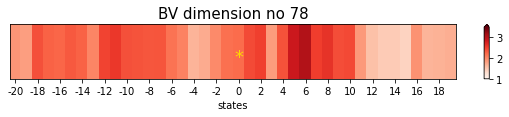

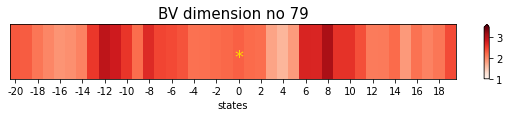

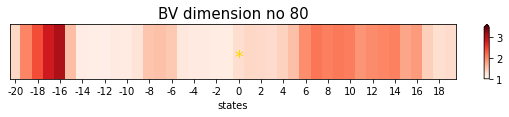

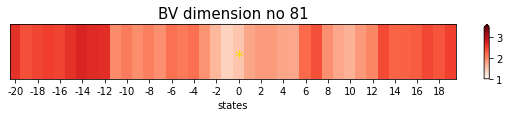

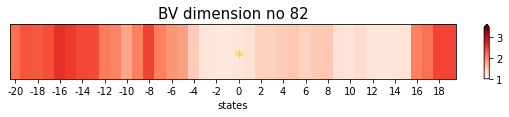

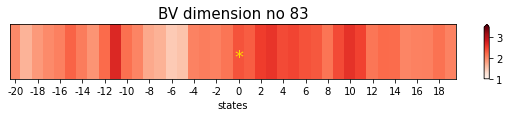

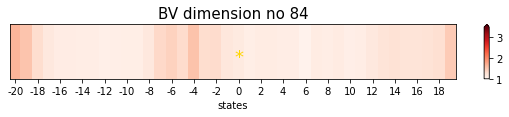

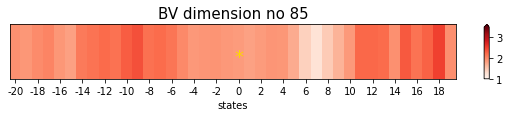

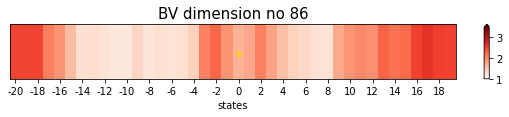

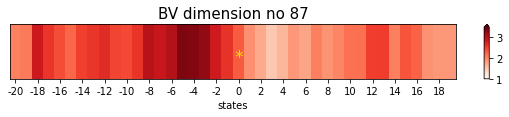

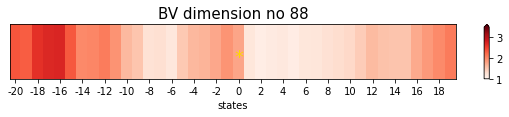

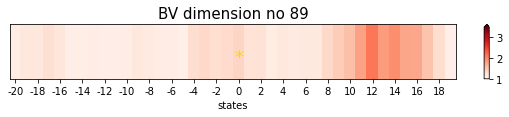

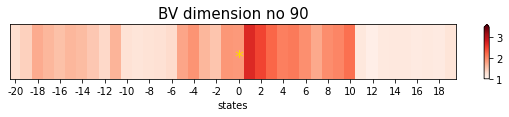

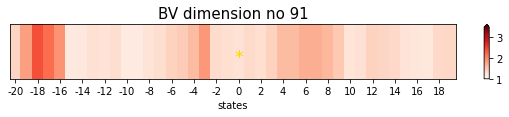

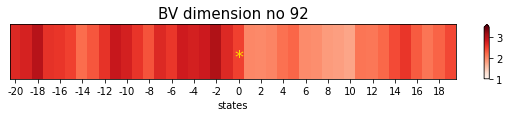

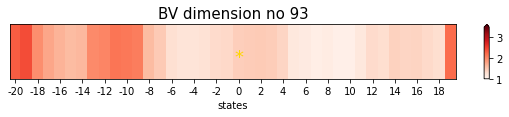

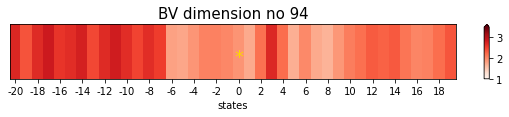

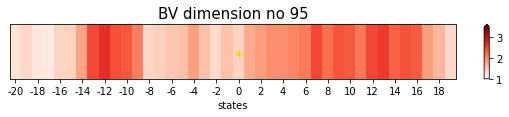

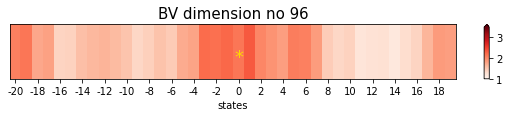

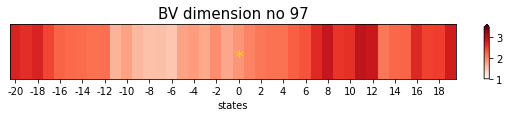

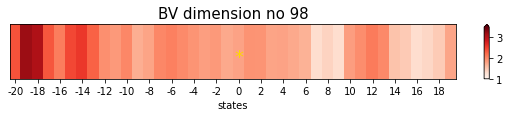

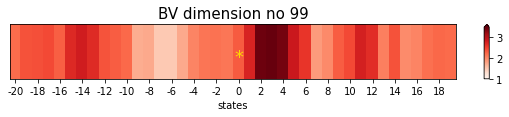

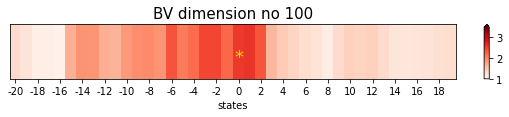

In [731]:
#normal value
for i in range(len(glo_extreme_series[0,:])):
    fig, ax = plt.subplots(figsize= (10,1))
    BV_dim_series_shift = np.zeros((delay_steps+1,40))
    state_tick = glo_extreme_series[1,i].astype(int)
    for p in range(state_tick-20,state_tick+20,1):
        BV_dim_series_shift[:,p-(state_tick-20)] = BV_dim_series[:, i, (p-1+40)%40]
    im = ax.pcolor(BV_dim_series_shift, cmap = 'Reds', vmin = 1, vmax = 3.5)
    #im = ax.pcolor(BV_dim_series[:,i,:], vmin = 1, vmax = 3)
    for j in range(delay_steps +1):
        plt.text(20 + 0.1, j + 0.3,'*',color = 'gold', fontsize = 18)
    fig.colorbar(im, extend = 'max', aspect = 10)
    ax.set_xlabel('states')
    ax.set_title("BV dimension no %s"%(i+1), size = 15)
    ax.xaxis.set(ticks = np.arange(0.5,40,2), ticklabels = np.arange(-20,20,2))
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(axis = 'y', which = 'both',length = 0)
    #ax.yaxis.set(ticks = np.arange(0.5,delay_steps + 1,2), ticklabels = np.arange(6*delay_steps,-12,-12))
    plt.savefig('normal_BV_dim%s'%(i+1),bbox_inches='tight')
    plt.show()


In [285]:
ap.min()
glo_extreme_series[0,0]

-10.624350876282568

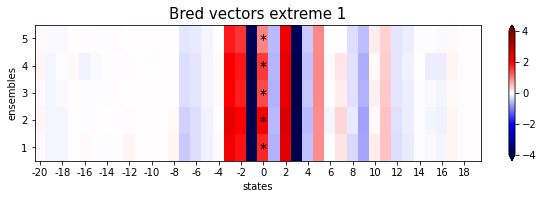

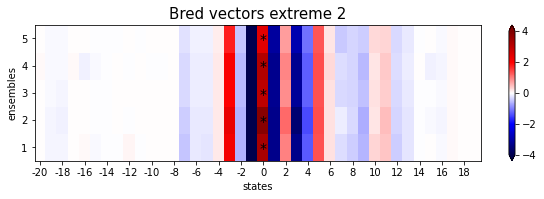

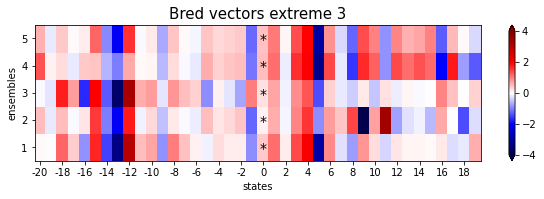

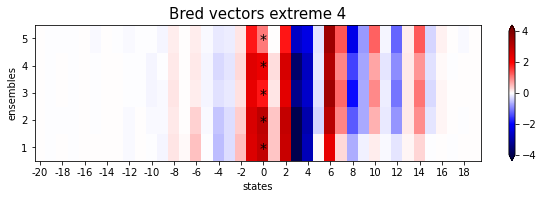

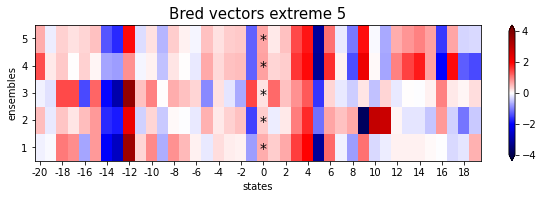

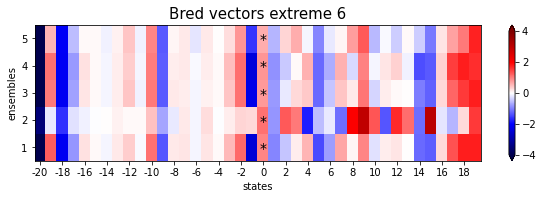

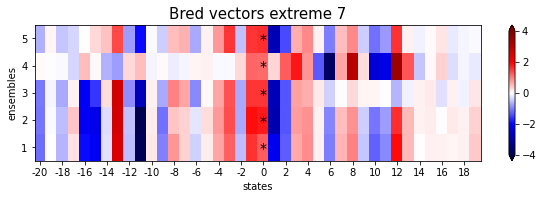

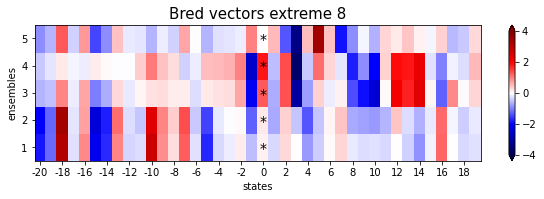

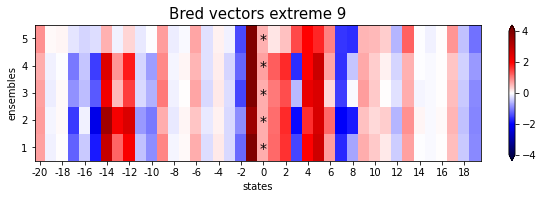

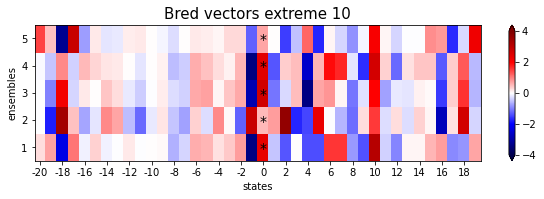

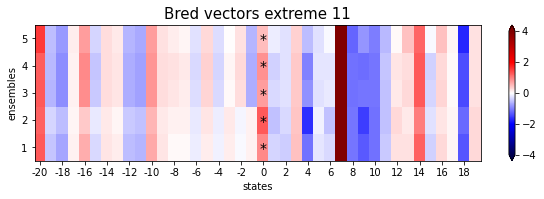

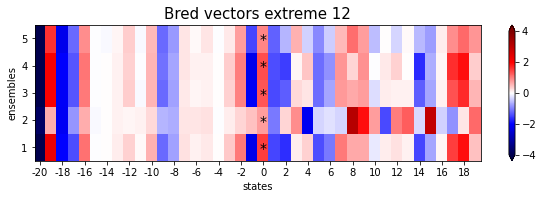

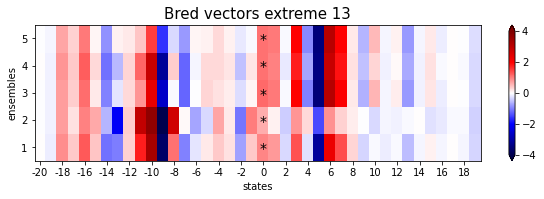

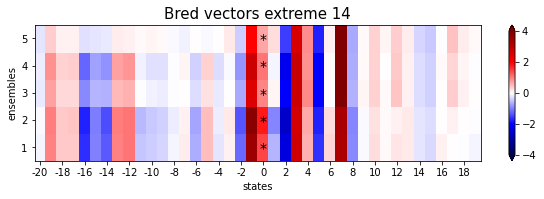

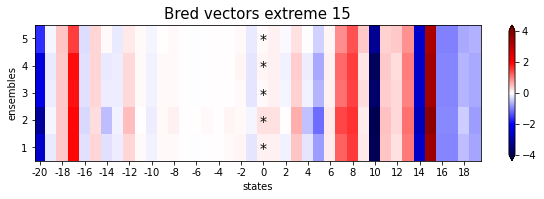

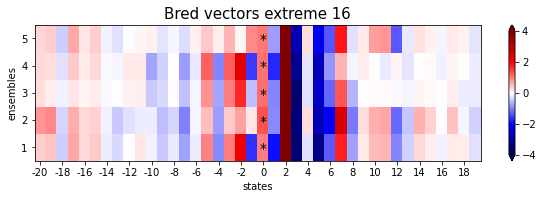

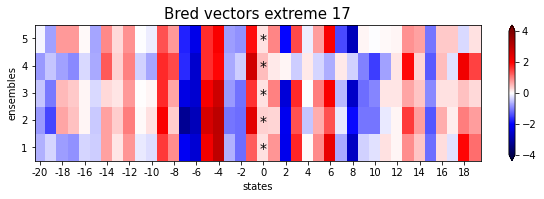

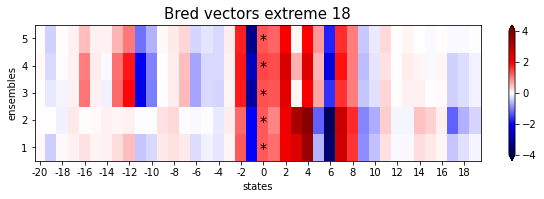

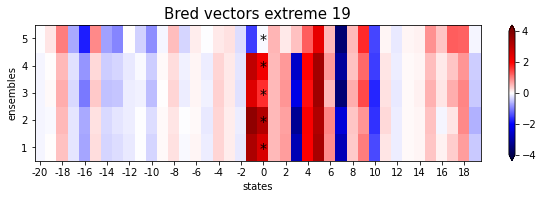

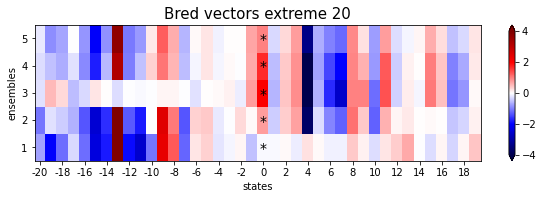

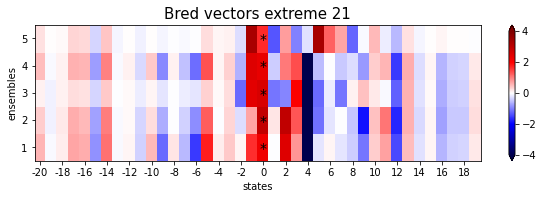

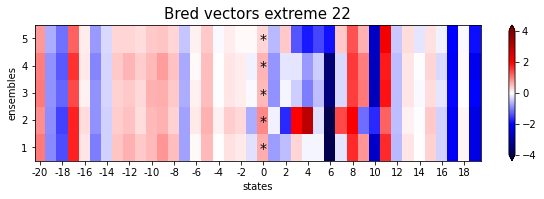

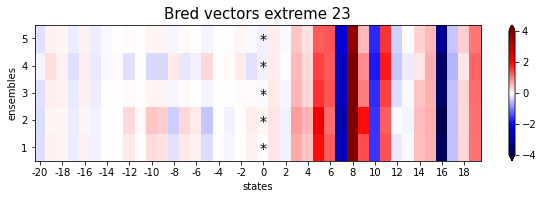

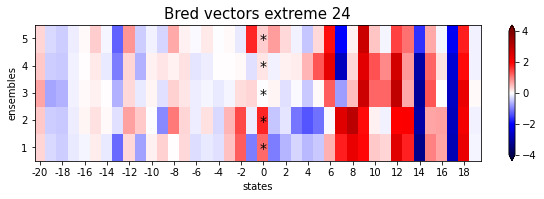

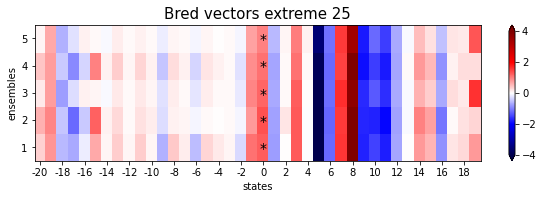

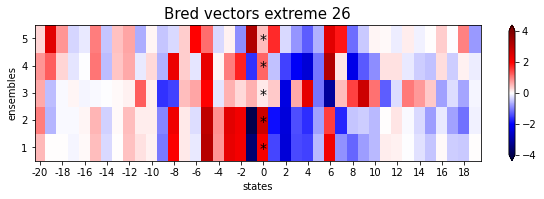

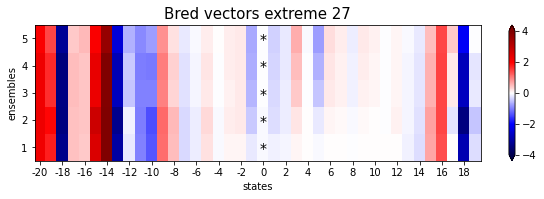

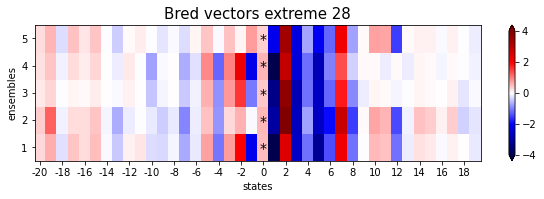

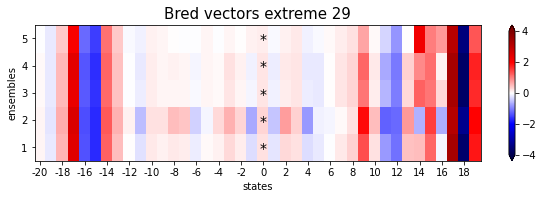

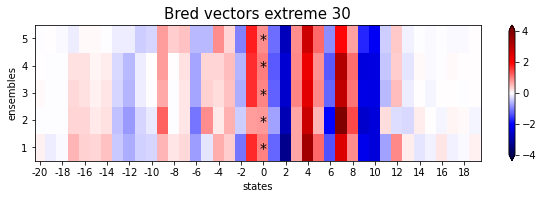

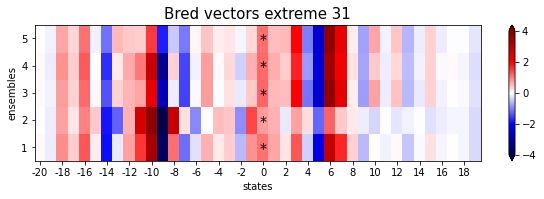

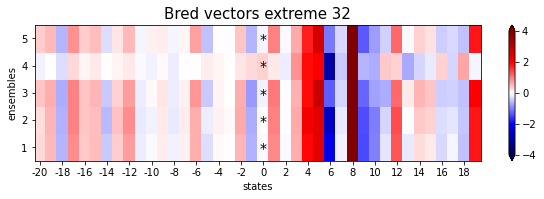

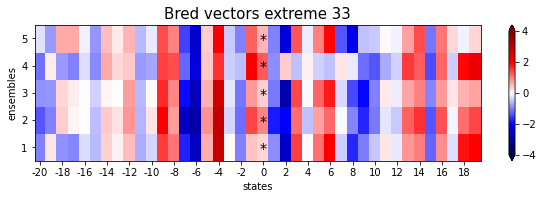

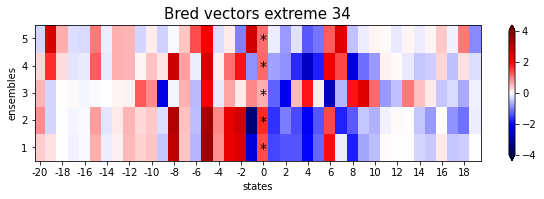

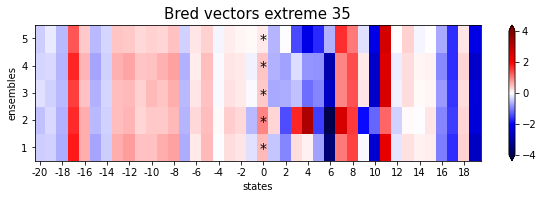

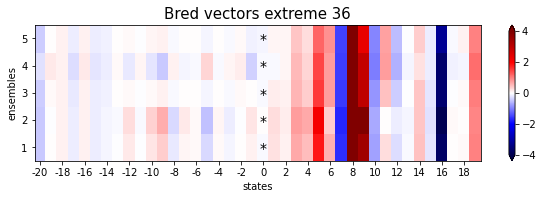

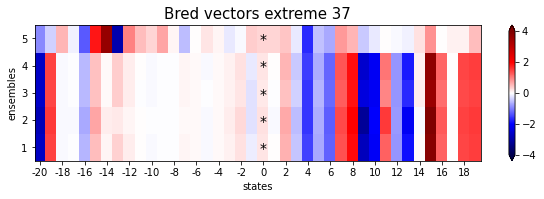

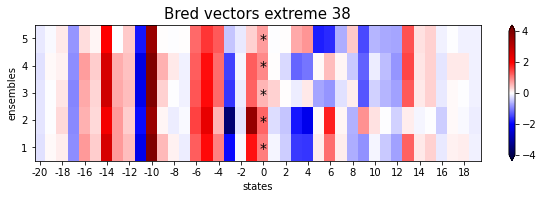

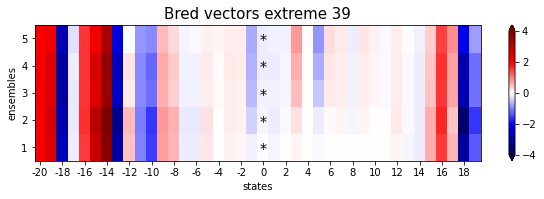

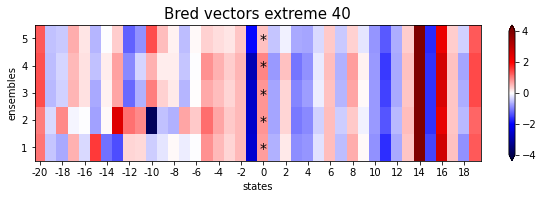

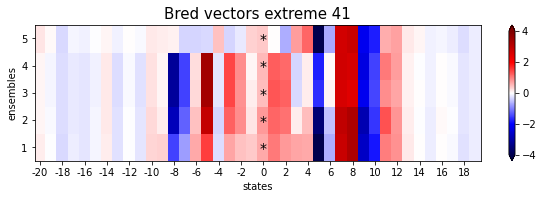

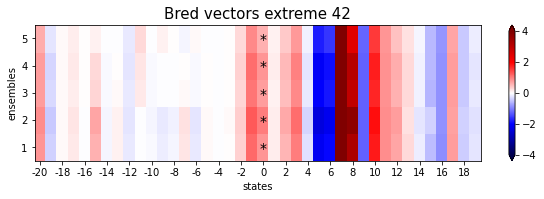

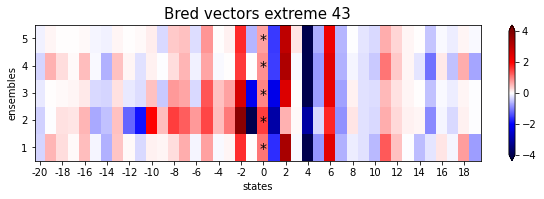

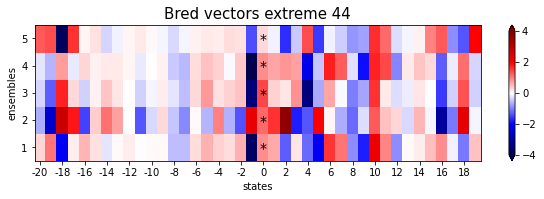

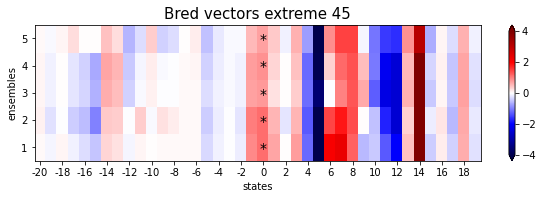

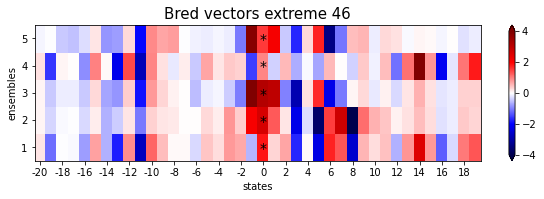

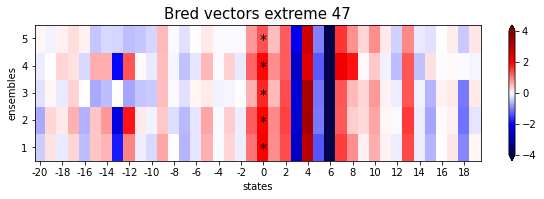

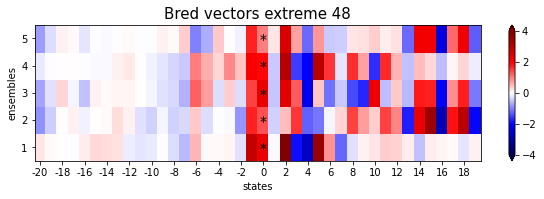

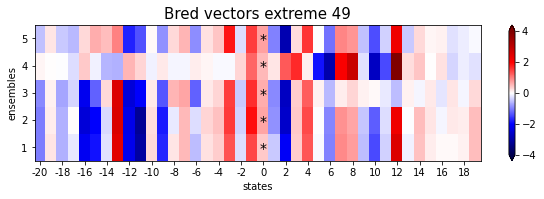

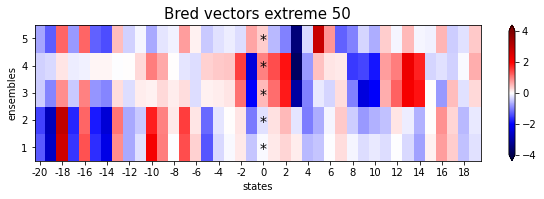

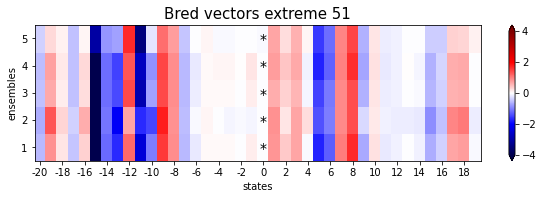

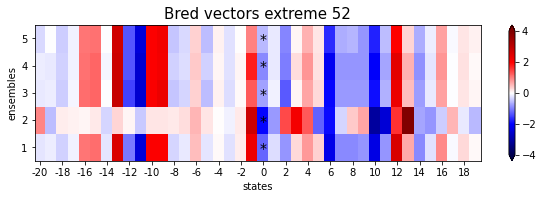

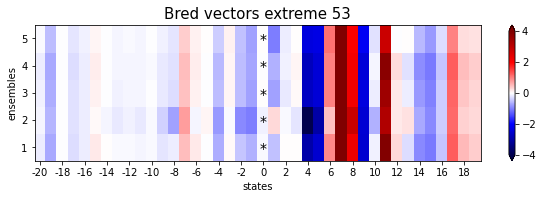

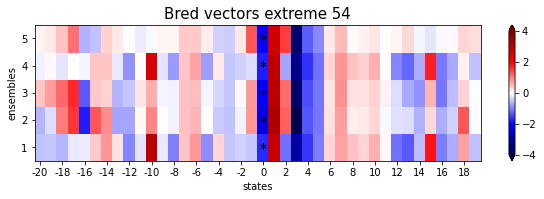

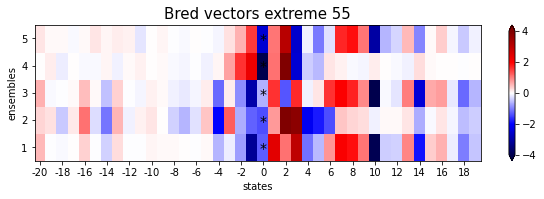

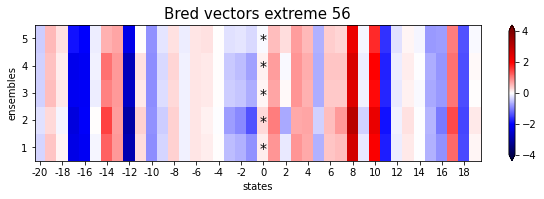

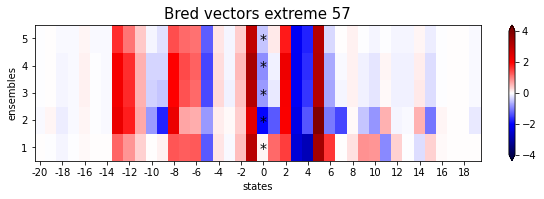

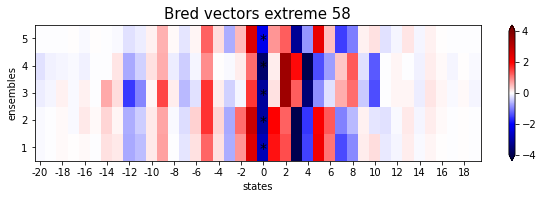

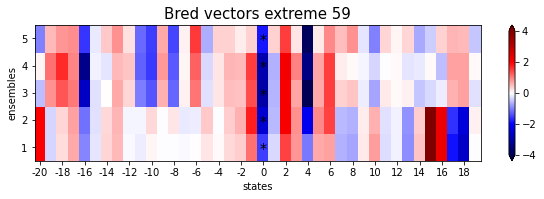

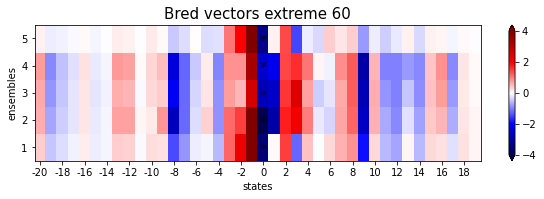

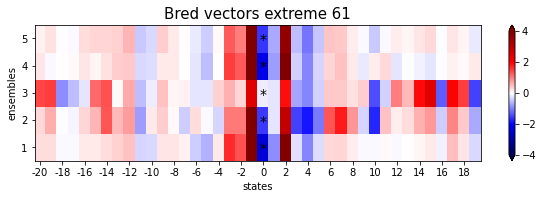

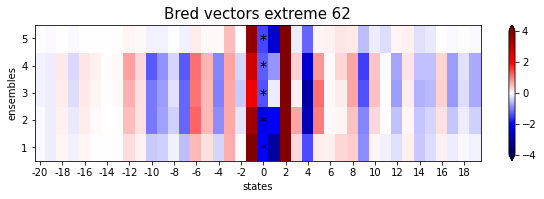

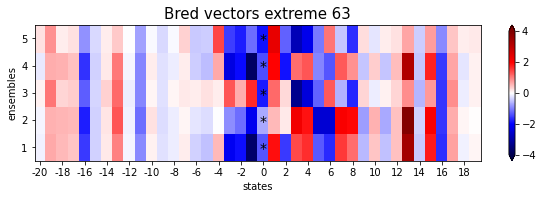

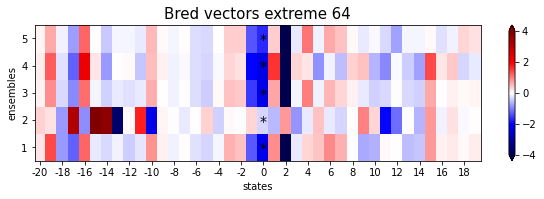

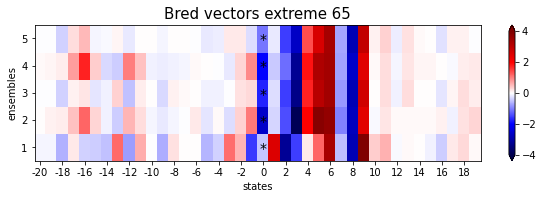

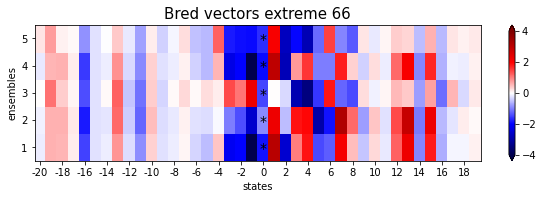

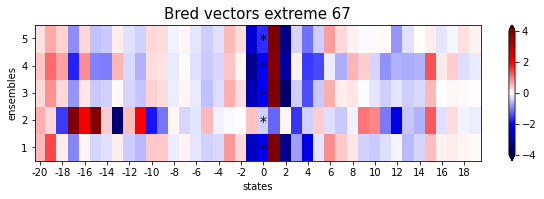

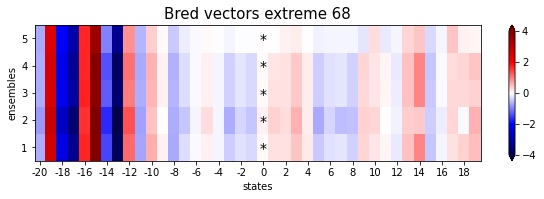

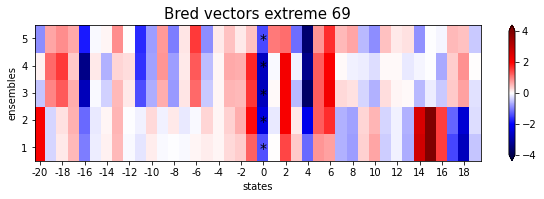

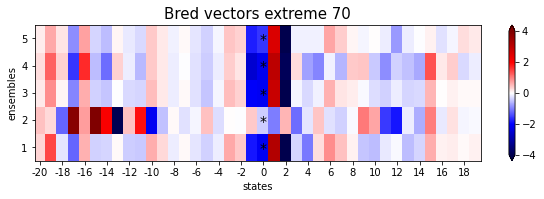

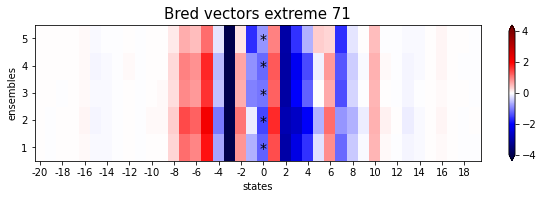

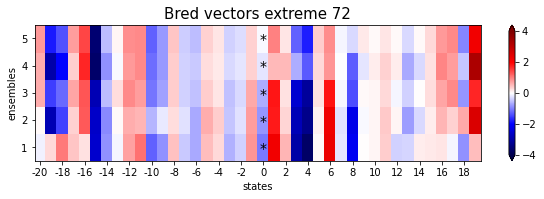

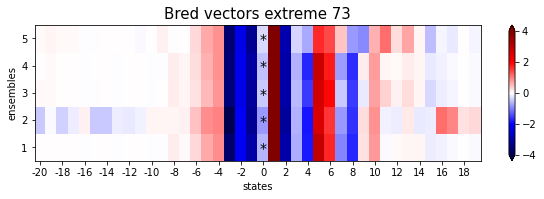

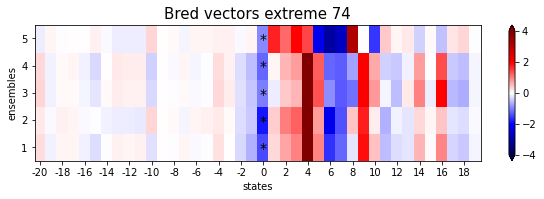

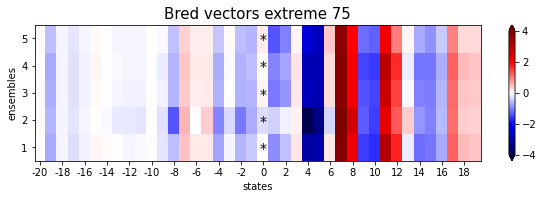

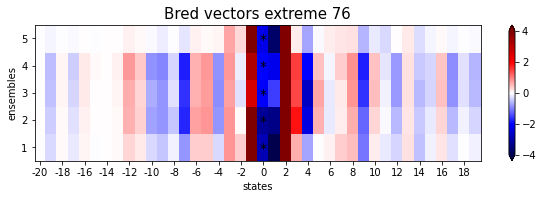

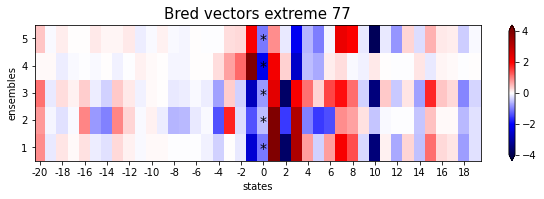

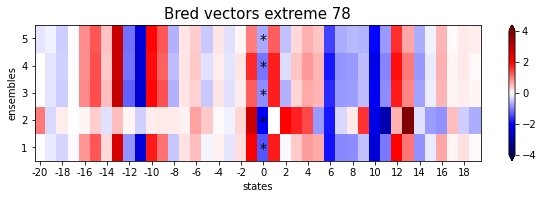

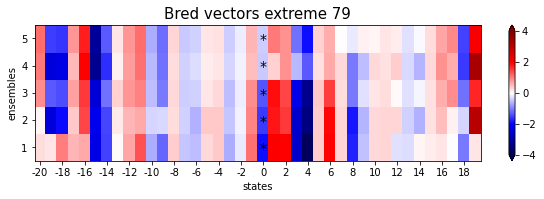

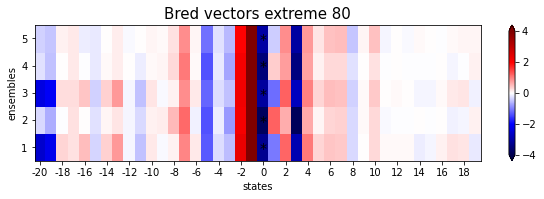

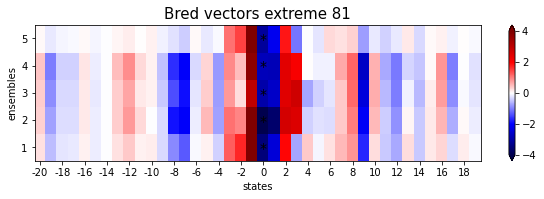

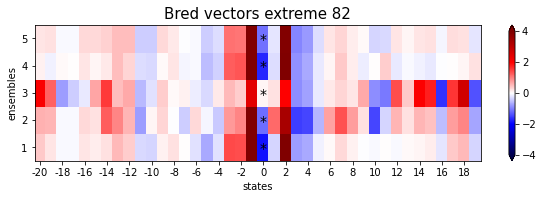

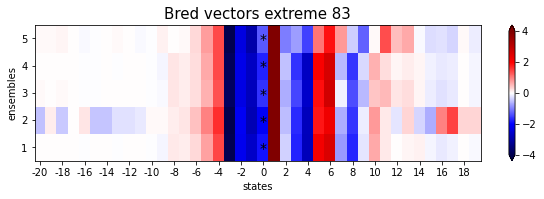

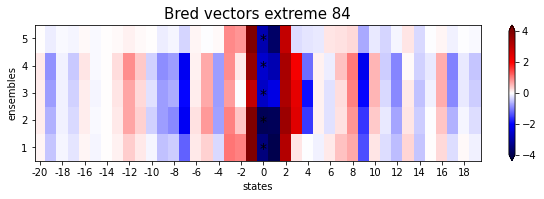

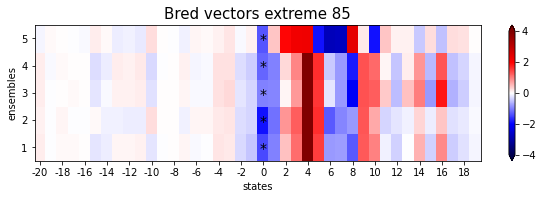

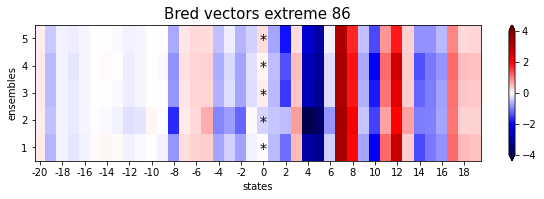

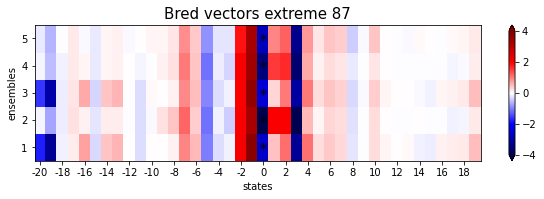

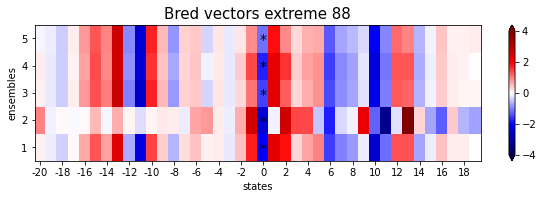

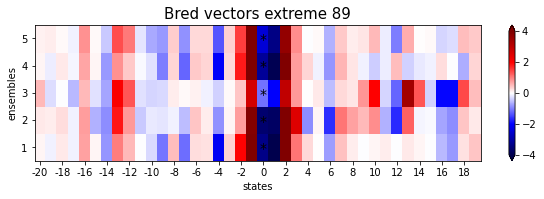

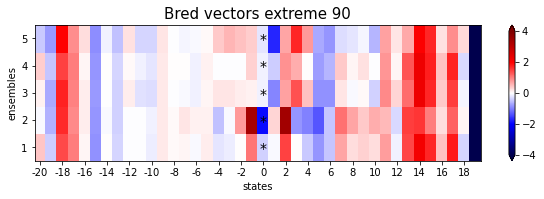

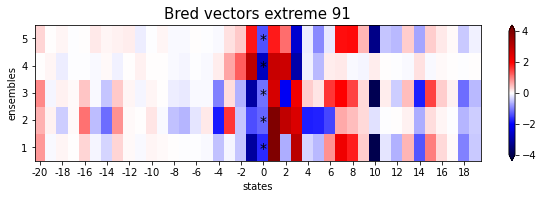

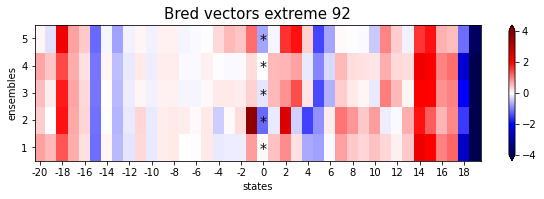

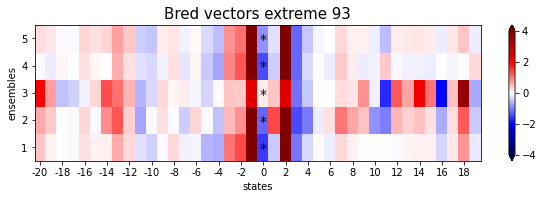

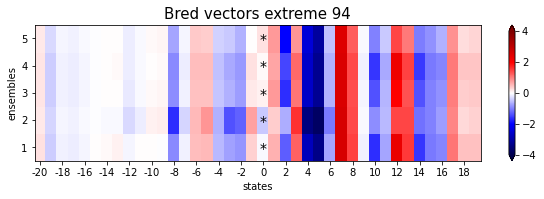

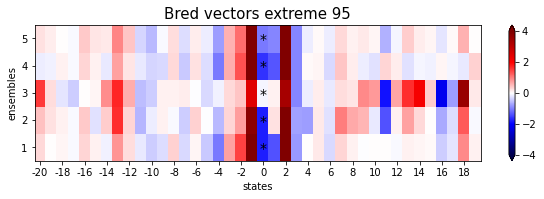

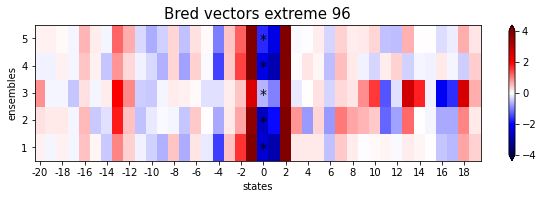

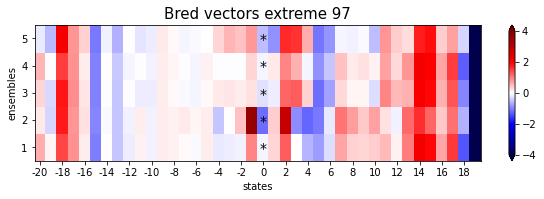

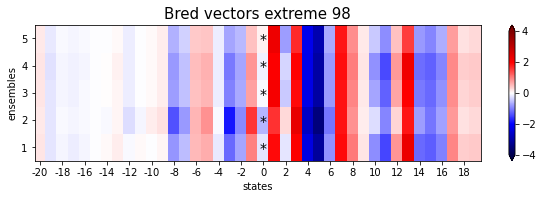

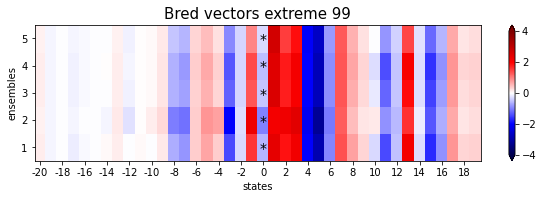

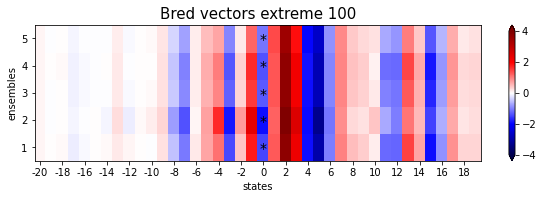

In [721]:
#extreme

for i in range(len(glo_extreme_series[0,:])):
    fig, ax = plt.subplots(figsize=(10,2.5))
    BV_shift = np.zeros((n_ens,40))
    state_tick = glo_extreme_series[1,i].astype(int)
    for p in range(state_tick-20,state_tick+20,1):
        BV_shift[:,p-(state_tick-20)] = all_bred_vector[:, (p-1+40)%40, int(glo_extreme_series[2,i]+0.001)]
    im = ax.pcolor(BV_shift, vmin = -4, vmax = 4)
    #im = ax.pcolor(all_bred_vector[:,:,int(glo_extreme_series[2,i]+0.001)],
    #               vmin = -4, vmax = 4)
    for j in range(n_ens):
        plt.text(20 +0.13,j+0.3,'*', fontsize = 14)
    fig.colorbar(im, extend = 'both')
    ax.set_xlabel('states')
    ax.set_ylabel('ensembles')
    ax.set_title("Bred vectors extreme %s"%(i+1), size = 15)
    ax.xaxis.set(ticks = np.arange(0.5,40,2), ticklabels = np.arange(-20,20,2))
    ax.yaxis.set(ticks = np.arange(0.5, n_ens + 0.5,1), ticklabels = np.arange(1,n_ens+1,1))
    plt.savefig('current_bred_vector_no_%s'%(i+1),bbox_inches='tight')
    plt.show()

    





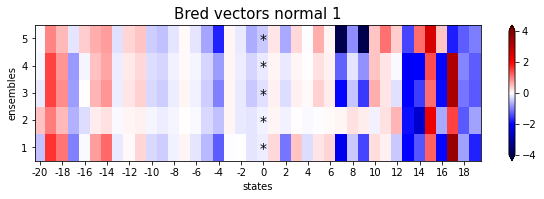

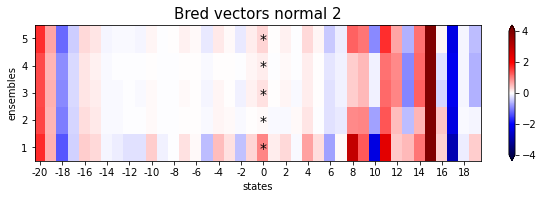

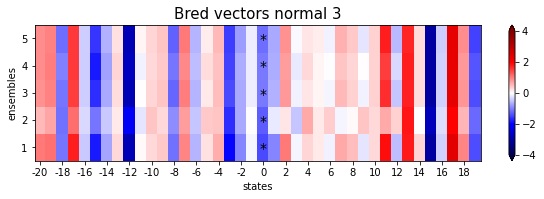

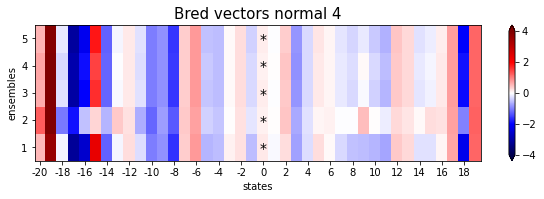

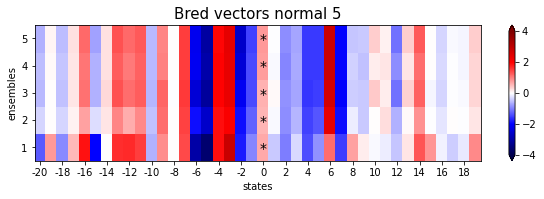

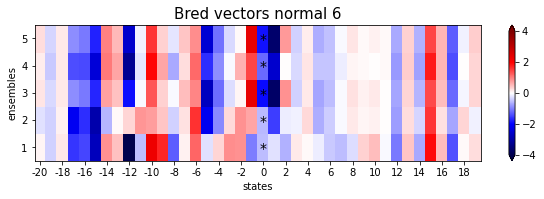

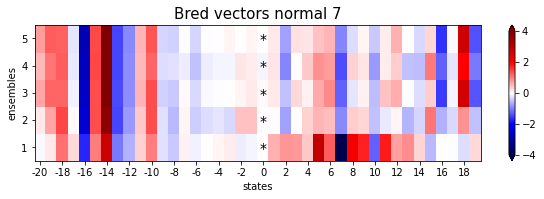

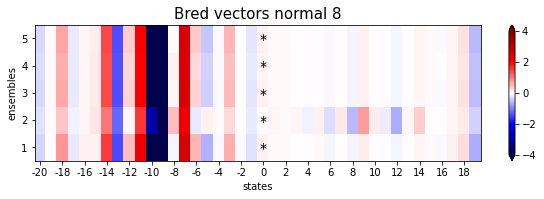

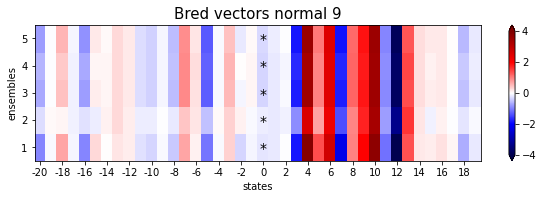

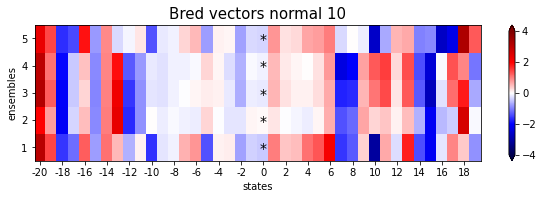

In [664]:
#normal value

for i in range(len(glo_extreme_series[0,:])):
    fig, ax = plt.subplots(figsize=(10,2.5))
    BV_shift = np.zeros((n_ens,40))
    state_tick = glo_extreme_series[1,i].astype(int)
    for p in range(state_tick-20,state_tick+20,1):
        BV_shift[:,p-(state_tick-20)] = all_bred_vector[:, (p-1+40)%40, random_time[i]]
    im = ax.pcolor(BV_shift, vmin = -4, vmax = 4)
    #im = ax.pcolor(all_bred_vector[:,:,int(glo_extreme_series[2,i]+0.001)],
    #               vmin = -4, vmax = 4)
    for j in range(n_ens):
        plt.text(20 +0.13,j+0.3,'*', fontsize = 14)
    fig.colorbar(im, extend = 'both')
    ax.set_xlabel('states')
    ax.set_ylabel('ensembles')
    ax.set_title("Bred vectors normal %s"%(i+1), size = 15)
    ax.xaxis.set(ticks = np.arange(0.5,40,2), ticklabels = np.arange(-20,20,2))
    ax.yaxis.set(ticks = np.arange(0.5, n_ens + 0.5,1), ticklabels = np.arange(1,n_ens+1,1))
    plt.savefig('normal_bred_vector_no_%s'%(i+1),bbox_inches='tight')
    plt.show()

    

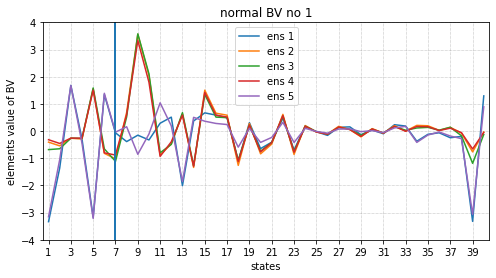

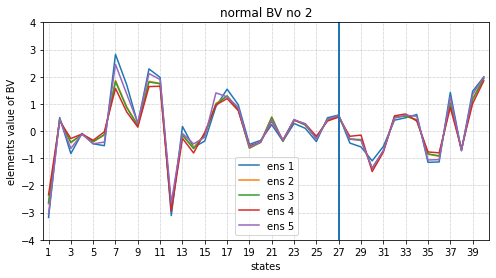

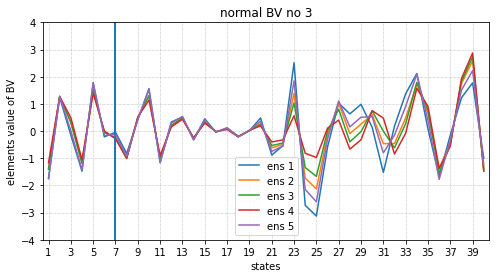

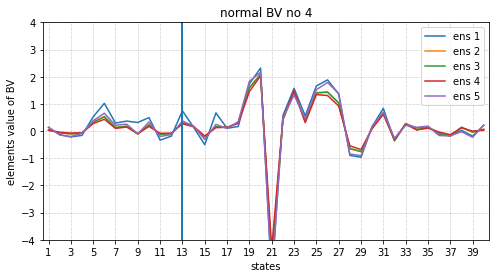

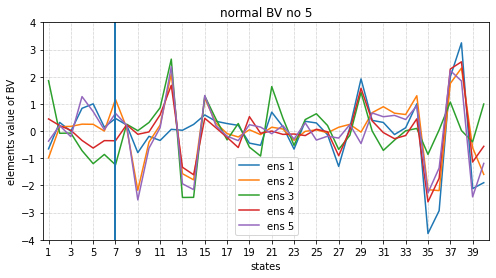

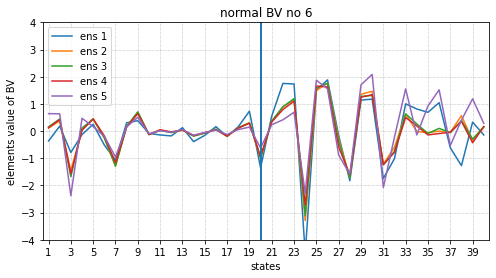

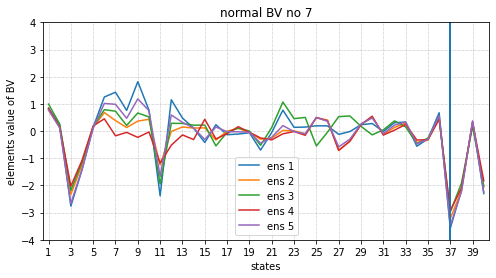

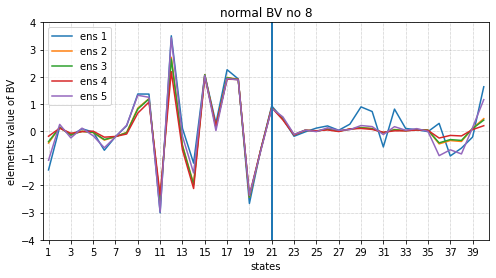

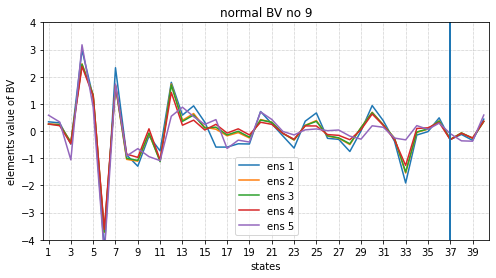

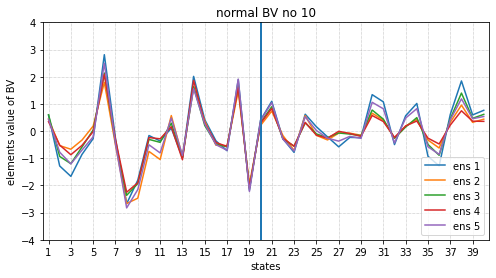

In [453]:
for i in range(10):
    plt.figure(figsize = (8,4))
    for j in range(n_ens):
        plt.plot(range(1,41), all_bred_vector[j,:,random_time[i]], label = 'ens %s'%(j+1))
        plt.axvline(glo_extreme_series[1,i], )
    plt.ylim(-4,4)
    plt.xlim(0.5,40.5)
    plt.xlabel('states')
    plt.ylabel('elements value of BV')
    plt.xticks(range(1,41,2))
    plt.legend(loc = 'best')
    plt.grid(color = 'grey', linestyle = ':', linewidth = 0.5)
    plt.title('normal BV no %s'%(i+1))
    plt.show()

In [ ]:
for i in range(10):
    plt.figure(figsize = (8,4))
    for j in range(n_ens):
        plt.plot(range(1,41), all_bred_vector[j,:,int(glo_extreme_series[2,i]+0.001)], label = 'ens %s'%(j+1))
        plt.axvline(glo_extreme_series[1,i], )
    plt.ylim(-4,4)
    plt.xlim(0.5,40.5)
    plt.xlabel('states')
    plt.ylabel('elements value of BV')
    plt.xticks(range(1,41,2))
    plt.legend(loc = 'best')
    plt.grid(color = 'grey', linestyle = ':', linewidth = 0.5)
    plt.title('BV no %s'%(i+1))
    plt.show()

In [9]:
import pickle
np.random.seed(123)
per = np.random.normal(0, 1, 40) #generate a perturbation vector
ini_loc_per_amplitude = np.zeros((len(radius_list), 40))
numb = -1
for r in radius_list:
    numb = numb + 1
    for k in range(40):
        for p in range(k-r,k+r+1,1):
            ini_per_local = np.zeros(2*r+1)
            ini_per_local[p -(k-r)] = per[(p+40)%40]
        amp = np.linalg.norm(ini_per_local)
        ini_loc_per_amplitude[numb,k] = amp
        
print(ini_loc_per_amplitude)   
with open("ini_per_amp_loc.txt", "wb") as fp:
    pickle.dump(ini_loc_per_amplitude, fp)
            
    

[[0.99734545 0.2829785  1.50629471 0.57860025 1.65143654 2.42667924
  0.42891263 1.26593626 0.8667404  0.67888615 0.09470897 1.49138963
  0.638902   0.44398196 0.43435128 2.20593008 2.18678609 1.0040539
  0.3861864  0.73736858 1.49073203 0.93583387 1.17582904 1.25388067
  0.6377515  0.9071052  1.4286807  0.14006872 0.8617549  0.25561937
  2.79858911 1.7715331  0.69987723 0.92746243 0.17363568 0.00284592
  0.68822271 0.87953634 0.28362732 1.0856306 ]]


In [3]:
from class_state_vec import state_vector

tra_file = 'lorenz96_run.pkl'

sv = state_vector()
sv = sv.load(tra_file)
trajectory = sv.getTrajectory()


In [92]:
#compute error growth rate
rescale_step_list = [5]
radius_list =  range(0,1,1)

error_growth_rate = np.zeros((len(rescale_step_list), len(radius_list), 40,len(trajectory[0,:])))
pp = -1

for s in rescale_step_list:
    pp = pp + 1
    rr = 0
    for r in radius_list:
        rf = state_vector()
        rf = rf.load('perturbation_amplitude_history_step%s_radius%s.txt'%(s,r))
        for i in range(19,20,1):
            error_growth_rate[pp, rr, i, :] = (1/s)*(np.log(rf[i,:]/ini_loc_per_amplitude[rr,i]))
        rr = rr + 1


<ipython-input-92-f9861937911f>:15: RuntimeWarning: divide by zero encountered in log
  error_growth_rate[pp, rr, i, :] = (1/s)*(np.log(rf[i,:]/ini_loc_per_amplitude[rr,i]))


In [4]:
extreme_series = sv.load('extreme_series.txt')

In [4]:
for m in range(40):
    print(error_growth_rate[0,0,m,:][np.isfinite(error_growth_rate[0,0,m,:])].max())
    print(error_growth_rate[0,0,m,:][np.isfinite(error_growth_rate[0,0,m,:])].min())


0.170980799028
-0.256335071327
0.174992674273
-0.227812085355
0.214561954239
-0.294875914315
0.402839219931
-0.514171152578
0.189865790561
-0.396797364255
0.236685915727
-0.428308468726
0.260471193963
-0.68661384097
0.25131618795
-0.438885860396
0.181240997924
-0.412599021197
0.241417185597
-0.648777898309
0.169280161773
-0.252160113189
0.20202215468
-0.324762584191
0.182786265378
-0.329306598077
0.301570835029
-0.557646700898
0.199341919764
-0.501958735255
0.508127973661
-0.610935402875
0.233841201676
-0.570075804618
0.228631697221
-0.366618704305
0.170549571752
-0.267811976682
0.181628470274
-0.27773031433
0.307025718155
-0.492950584797
0.353400727621
-0.600846704181
0.172878155515
-0.41803052788
0.239781915168
-0.357758849009
0.285150172403
-0.423675317154
0.138848741425
-0.331997515335
0.237467298085
-0.405789190345
0.198845585039
-0.445348974336
0.207199677576
-0.310393641834
0.19339256648
-0.367851734612
0.2896856214
-0.511099254788
0.190616297279
-0.282036452581
0.197508004785
-

In [20]:
import matplotlib as mpl
import pylab as pl
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt

def error_growth(ensemble, extreme, vmin, vmax, outfile = 'difference between forecast and analysis', plot_title = 'difference between forecast and analysis'):
       fig, ax = plt.subplots()
       plt.pcolor(ensemble, vmin=vmin, vmax=vmax)
       plt.ylabel('states', fontsize=17)
       plt.xlabel('time', fontsize=17)
       plt.xticks(size = 11)
       plt.yticks(size = 11)
       for m in extreme:
            plt.axvline(m, color = 'k')  
       #plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(16400))
       #tick = date_generated
       #tick = [i.strftime("%d-%b-%y") for i in tick]
       #newYlabel = tick
       #pl.gca().set_xticklabels(newYlabel)
       #degrees = 30
       #plt.xticks(rotation=degrees)
       plt.colorbar(extend = 'both')
       plt.title(plot_title, fontsize=18)
       plt.rcParams['image.cmap'] = 'seismic'
       plt.rcParams['figure.figsize'] = [35/1,5/1]
       plt.savefig(outfile)
       plt.show()
    
#error_growth(error_growth_rate[0,0,:,:], vmin =-0.5, vmax = 0.5, outfile = 'error_growth_rate_step5_radius1', plot_title = 'error_growth_rate_step5_radius1')
error_growth(error_growth_rate[0,0,0:1,:], extreme_series[0,1,:], vmin =-0.25, vmax = 0.25, outfile = 'error_growth_rate_step5_radius1_state0', plot_title = 'error_growth_rate_step5_radius1_state0')


state 1 average growth rate = 0.016677127053
state 1 percent of positive growth rate = 0.673287671233
state 2 average growth rate = 0.00873267275169
state 2 percent of positive growth rate = 0.617287671233
state 3 average growth rate = 0.00551834597996
state 3 percent of positive growth rate = 0.54552739726
state 4 average growth rate = 0.0550266765524
state 4 percent of positive growth rate = 0.776404109589
state 5 average growth rate = 0.0104857977903
state 5 percent of positive growth rate = 0.588890410959
state 6 average growth rate = 0.0298038016409
state 6 percent of positive growth rate = 0.727157534247
state 7 average growth rate = 0.042082536603
state 7 percent of positive growth rate = 0.765876712329
state 8 average growth rate = 0.040452037914
state 8 percent of positive growth rate = 0.767767123288
state 9 average growth rate = 0.0242832247001
state 9 percent of positive growth rate = 0.711582191781
state 10 average growth rate = 0.0399023916469
state 10 percent of positive

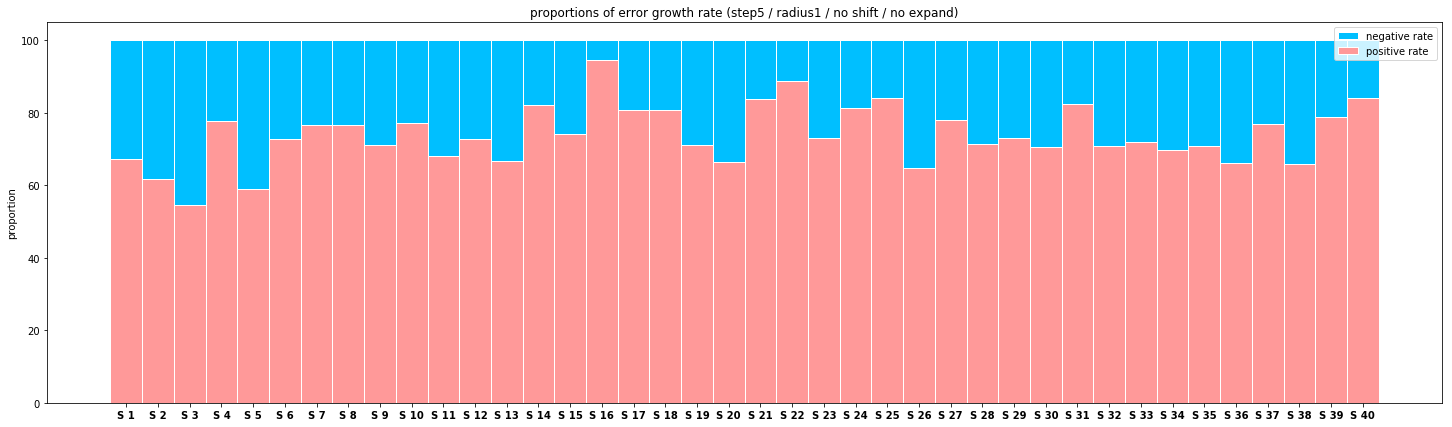

In [7]:
#print(error_growth_rate[0,0,0,:])
proportions_of_growth_rate = np.zeros((40,2))

for p in range(40): 
    cc = 0
    for i in range(1,len(trajectory[0,:])):
        if error_growth_rate[0,0,p,i]>0:
            cc = cc+1
    proportions_of_growth_rate[p,0] = cc/len(trajectory[0,:])
    proportions_of_growth_rate[p,1] = 1 - cc/len(trajectory[0,:])
    
    print('state %s average growth rate ='%(p+1), np.mean(error_growth_rate[0,0,p,1:]))
    print('state %s percent of positive growth rate ='%(p+1), proportions_of_growth_rate[p,0])

plt.figure(figsize=(25,7))
barWidth = 1
quarter = [None for y in range(40)]
for q in range(40):
    quarter[q] = 'S %s'%(q+1)

r = range(40)
ax1 = plt.bar(r, proportions_of_growth_rate[:,1] * 100, bottom=proportions_of_growth_rate[:,0] * 100, color='#00BFFF', edgecolor='white', width=barWidth, label="negative rate")
ax2 = plt.bar(r, proportions_of_growth_rate[:,0] * 100, color='#FF9999', edgecolor='white', width=barWidth, label='positive rate')
plt.legend()
plt.xticks(r, quarter, fontweight='bold')
plt.ylabel("proportion")
plt.title('proportions of error growth rate (step5 / radius1 / no shift / no expand)')
plt.savefig("proportions_of_growth_rate.png")
plt.show()

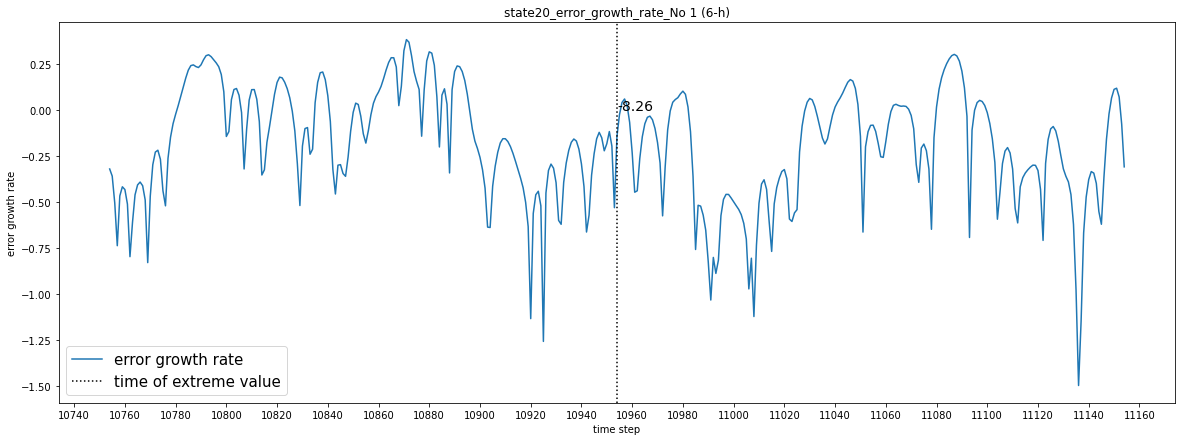

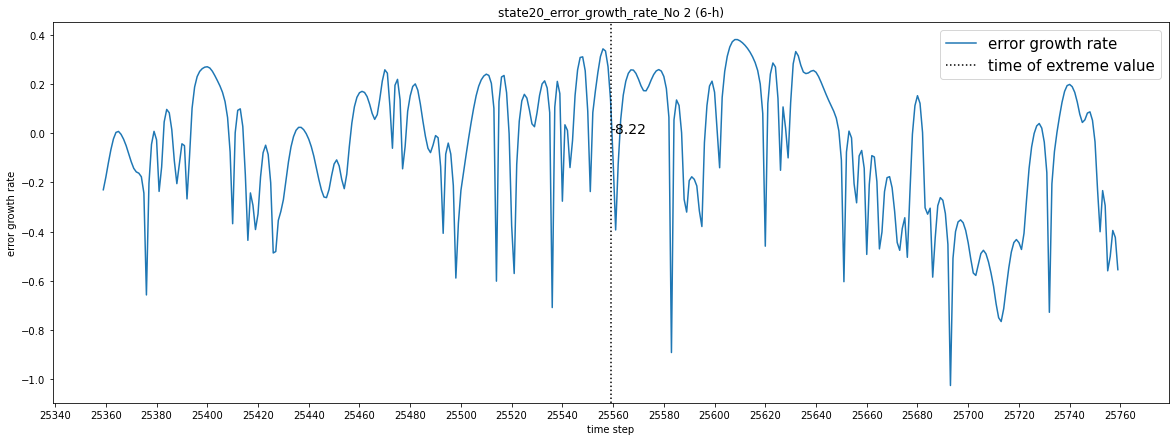

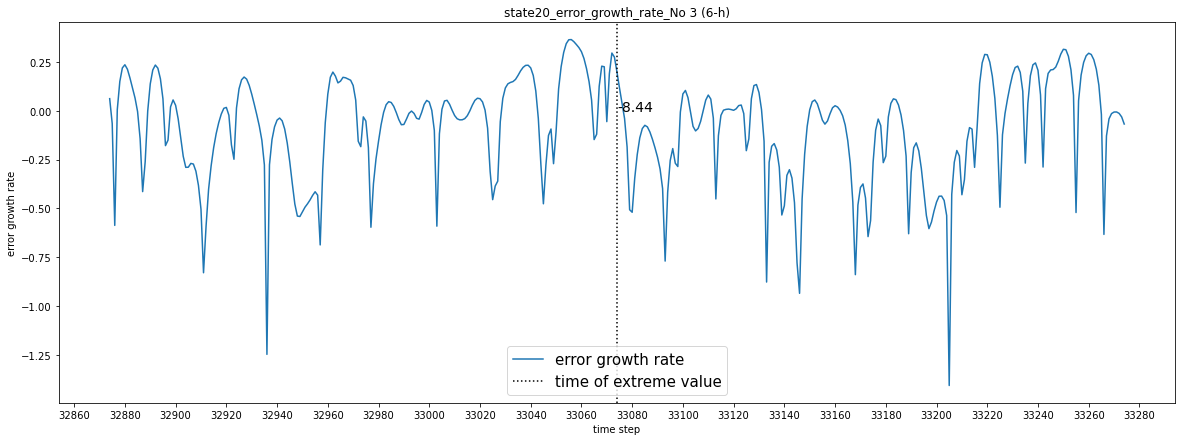

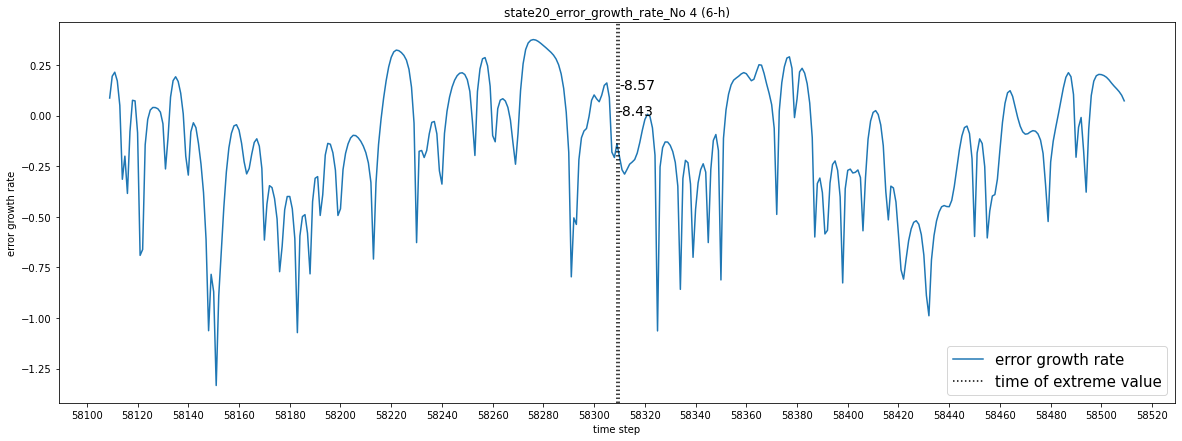

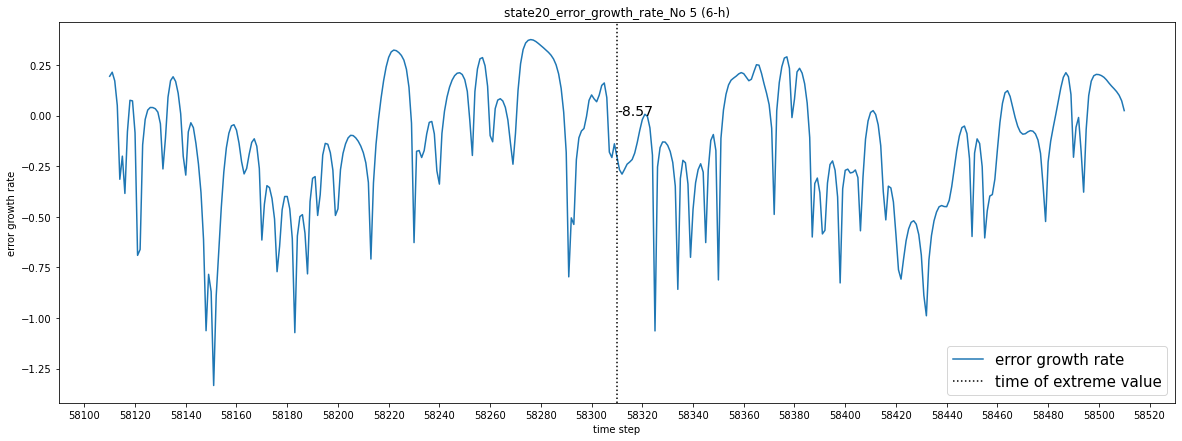

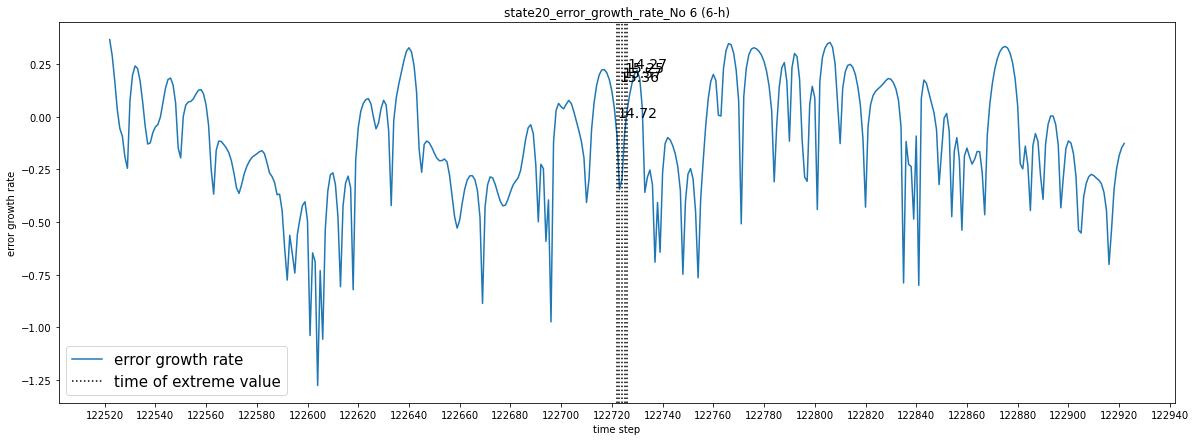

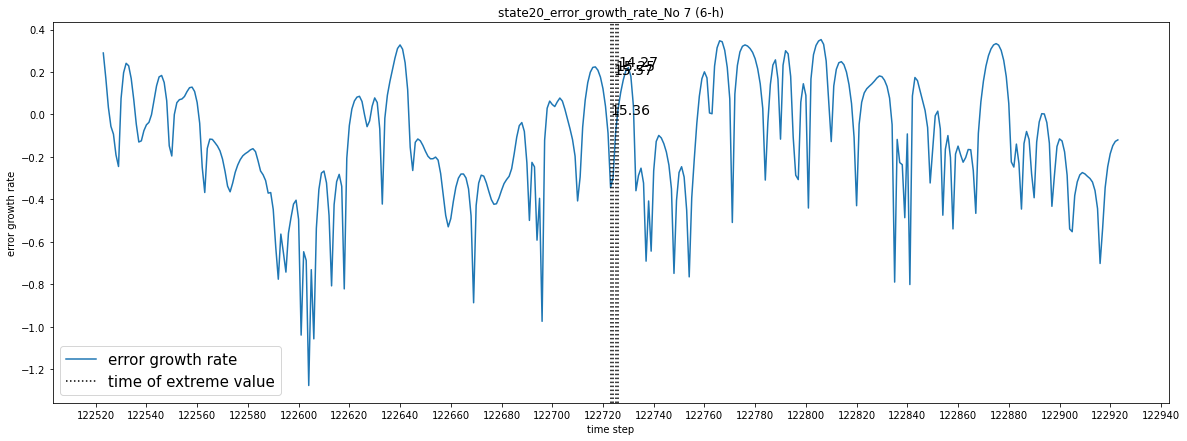

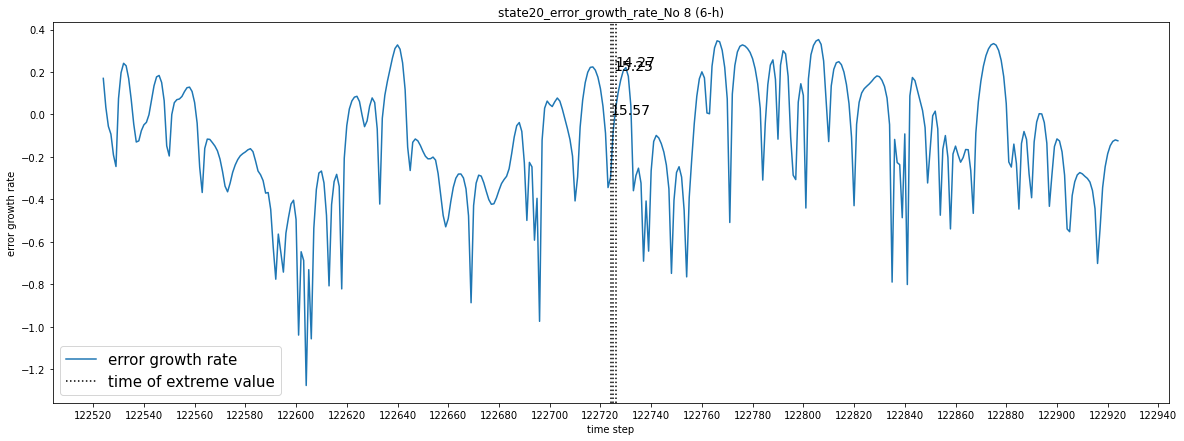

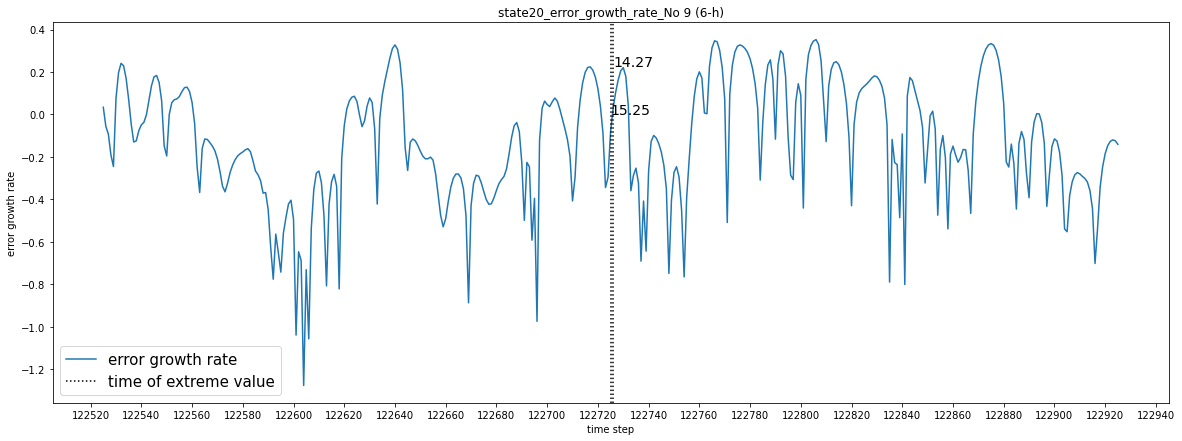

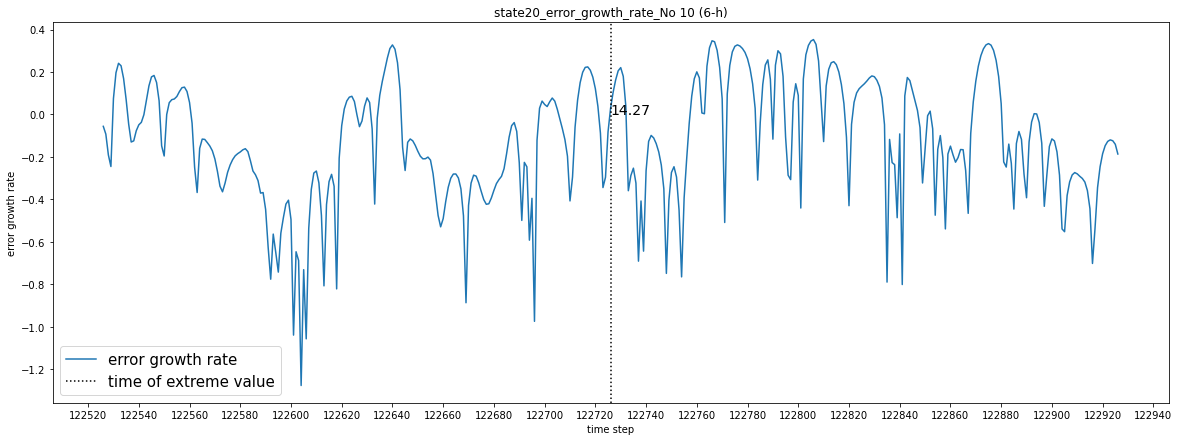

In [93]:
import matplotlib as mpl
import pylab as pl
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt

def extreme_growth_rate(i,extreme_time, err_gro_rate, outfile = 'name', plot_title = 'name' ):
    plt.figure(figsize=(20,7))
    plt.plot(np.arange(extreme_time[1,i]-200,extreme_time[1,i]+201,1),err_gro_rate[int(extreme_time[1,i]-200+0.1):int(extreme_time[1,i]+201+0.1)].T, label = 'error growth rate')
    plt.rcParams['figure.figsize'] = [10/1,5/1]
    plt.axvline(extreme_time[1,i], color = 'k', linestyle = ':', label = 'time of extreme value')
    plt.text(extreme_time[1,i],0, round(extreme_time[0,i],2), rotation=0, fontsize = '14')
    for s in range(i+1, 10, 1):
        if extreme_time[1,s]< extreme_time[1,i]+11:
            plt.axvline(extreme_time[1,s], color = 'k',linestyle = ':')
            plt.text(extreme_time[1,s],0.05+s/50, round(extreme_time[0,s],2), rotation=0, fontsize = '14')
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(20))
    plt.xlabel('time step')
    plt.ylabel('error growth rate')
    plt.legend(loc='best', prop={'size': 15}) 
    plt.title(plot_title)
    plt.savefig(outfile)
    plt.show()

for i in range(10):
    #extreme_growth_rate(i, extreme_series[39,:,:], error_growth_rate[0,0,39,:], outfile = 'state40_error_growth_rate_loc%s'%(i+1), plot_title = 'state40_error_growth_rate_loc%s'%(i+1))
    extreme_growth_rate(i, extreme_series[19,:,:], error_growth_rate[0,0,19,:], outfile = 'state20_glo_error_growth_rate_N%s(6h)'%(i+1), plot_title = 'state20_error_growth_rate_No %s (6-h)'%(i+1))



5840000


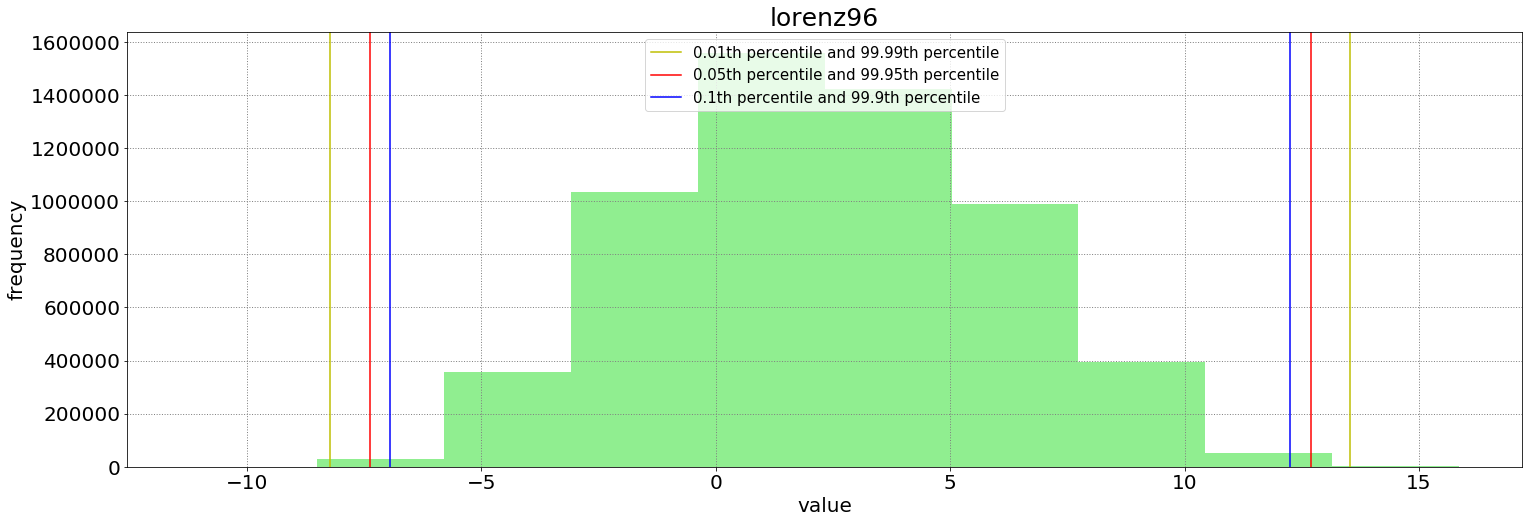

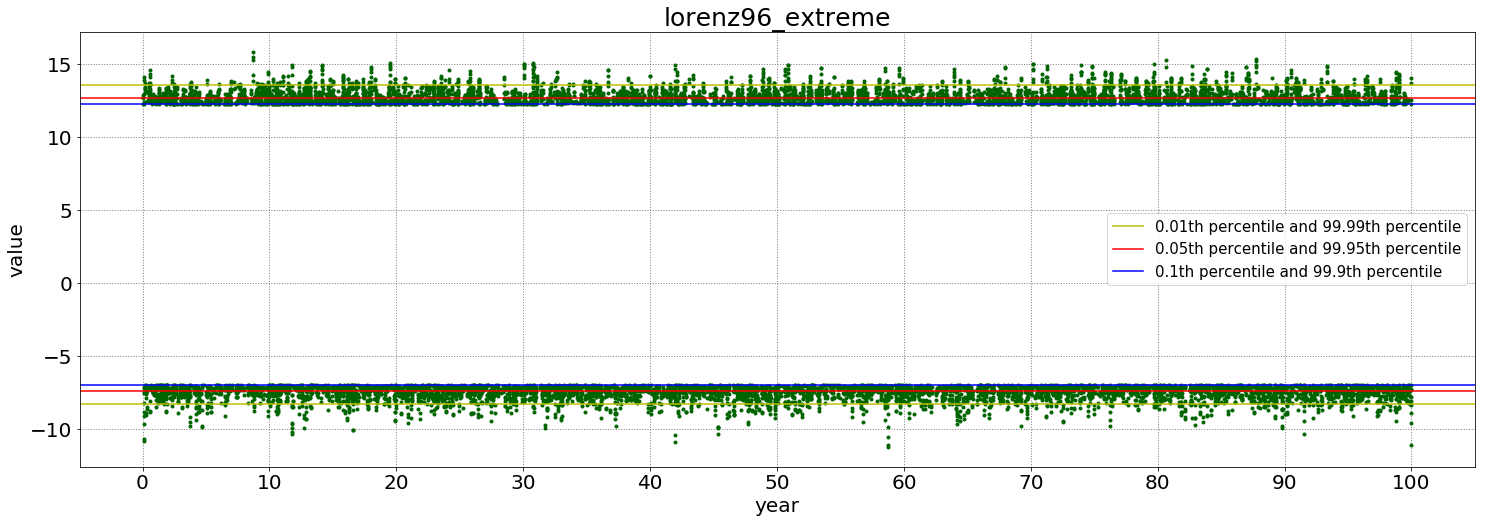

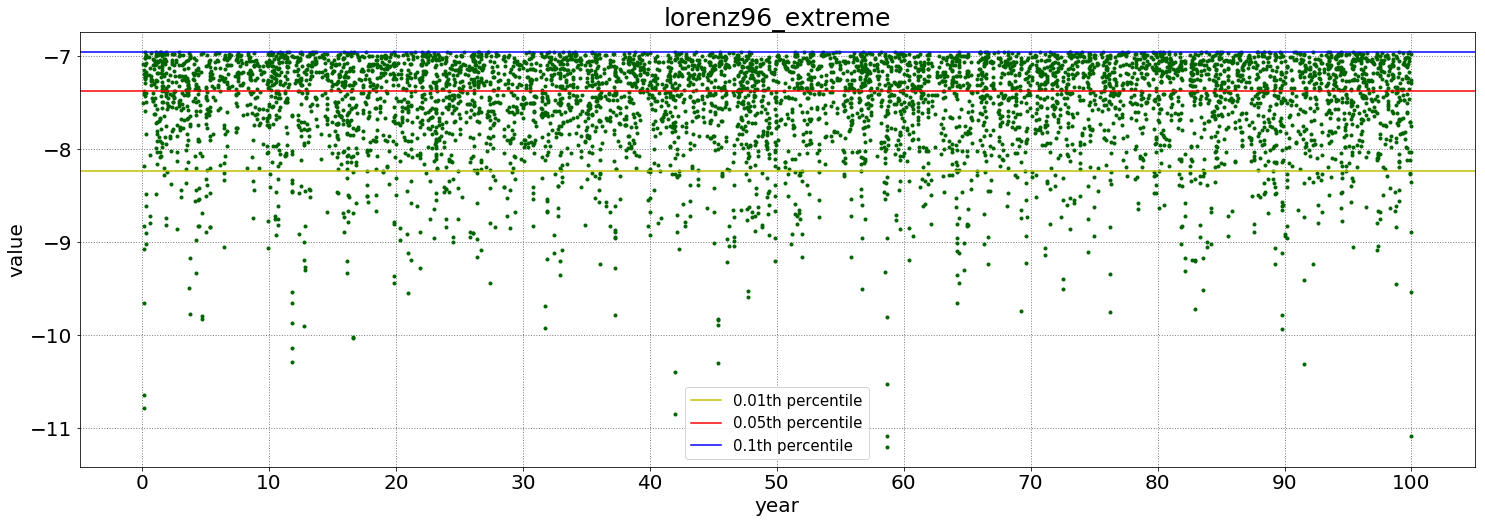

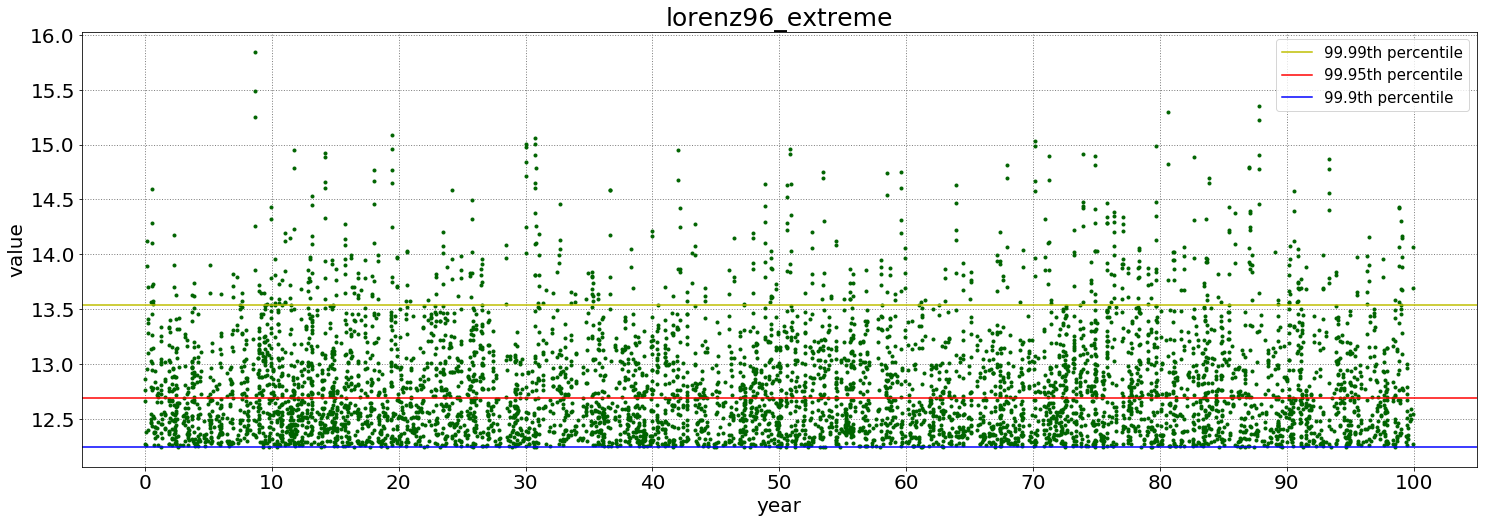

In [9]:
print(len(trajectory_flatten_withtime[0,:]))

smd.plot_hist(trajectory_flatten, q01, q05, q1, q999, q9995, q9999, outfile = 'lorenz96', plot_title = 'lorenz96')

smd.plot_extreme(trajectory_flatten_withtime[:,:], q01, q05, q1, q999, q9995, q9999, outfile = 'lorenz96_extreme_both', plot_title = 'lorenz96_extreme')
smd.plot_extreme_min(trajectory_flatten_withtime[:,:], q01, q05, q1, outfile = 'lorenz96_extreme_lower', plot_title = 'lorenz96_extreme')
smd.plot_extreme_max(trajectory_flatten_withtime[:,:],  q999, q9995, q9999, outfile = 'lorenz96_extreme_upper', plot_title = 'lorenz96_extreme')

[ 1.81234133  1.87370958  1.93445115 ...,  4.64578097  4.62509519
  4.60892928]
3000


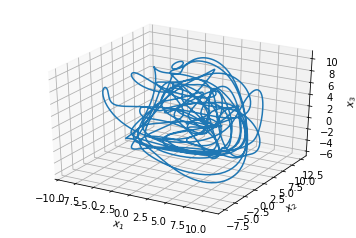

In [58]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# These are our constants
N = 40  # Number of variables
F = 8  # Forcing

def lorenz96(t, x):
    """Lorenz 96 model."""
    # Compute state derivatives
    d = np.zeros(N)
    # First the 3 edge cases: i=1,2,N
    d[0] = (x[1] - x[N-2]) * x[N-1] - x[0]
    d[1] = (x[2] - x[N-1]) * x[0] - x[1]
    d[N-1] = (x[0] - x[N-3]) * x[N-2] - x[N-1]
    # Then the general case
    for i in range(2, N-1):
        d[i] = (x[i+1] - x[i-2]) * x[i-1] - x[i]
    # Add the forcing term
    d = d + F

    # Return the state derivatives
    return d

x0 = F + np.random.normal(0, 1, N)  # Initial state (equilibrium)
#x0[19] += 0.01  # Add small perturbation to 20th variable
t = np.arange(0.0, 300.0, 0.01)

#x = odeint(lorenz96, x0, t)
x=solve_ivp(lorenz96,(t[0],t[-1]), x0, t_eval = np.arange(0.0, 30.0, 0.01))
#print(len(x[:,0]))
x = x.y
print(x[0,:])
print(len(x[0,:]))
# Plot the first three variables
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x[0,:], x[1,:], x[2,:])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
plt.show()


In [74]:
a = np.mean(x)
print(a)
diff = x - a
diff = diff.flatten()
print(diff)
b = np.sqrt(np.dot(diff,diff)/len(diff))
print(b)

2.3864742196
[-0.57413289 -0.51276464 -0.45202307 ..., -3.32204467 -3.22289713
 -3.11972386]
3.6256065634
